## Description of the problem

The problem concerns a network of buoys that produce electricity from renewable sources and use this energy for water desalination. Furthermore, vessels (such as boats) can go to a buoy to stock up on desalinated water and energy. The goal is to efficiently manage the production and use of resources.

## Detail of the Model
### Production and Desalination System

Each buoy is equipped with:
* Energy production system: produces electricity from renewable sources, indicated as $c_r$
* Battery: stores the energy produced with a discharge efficiency $r_s$
* Desalination system: Transforms energy into desalinated water with an efficiency $r_d$.

## Dynamic Equations

The dynamic equations describe the evolution of the accumulated energy and desalinated water over time.

### First case for each boy
$$
    \begin{cases}
      x_1(k+1)=c_r\\
      x_2(k+1)=x_2(k)+\frac{x_1(k)}{k_c}
    \end{cases}\
$$

in matrix form:

$$
    x(k+1)=
    \begin{bmatrix}
    0 & 0 \\
    \frac{1}{k_c} & 1 
    \end{bmatrix}
    \begin{bmatrix}
    x_1 \\
    x_2 
    \end{bmatrix}
    +
    \begin{bmatrix}
    c_r \\
    0 
    \end{bmatrix}
$$

Where:
* $x_1$ represents the accumulated energy.
* $x_2$ represents accumulated water.
* $c_r$ is the constant amount of renewable energy available.
* $k_c$ is an energy to water conversion parameter.

## Second case for each boy
$$
    \begin{cases}
      x_1(k+1)=x_1(k)-k_cx_2(k)+(c_r+k_cx_2^{target})\\
      x_2(k+1)=x_2^{target}
    \end{cases}\
$$

in matrix form:

$$
    x(k+1)=
    \begin{bmatrix}
    1 & -k_c \\
    0 & 0 
    \end{bmatrix}
    x(k)
    +
    \begin{bmatrix}
    c_r+k_cx_2^{target} \\
    x_2^{target} 
    \end{bmatrix}
$$

## Complete case
$$
\begin{bmatrix}
\begin{bmatrix}
x_1^1 \\
x_2^1 
\end{bmatrix} \\
.\\.\\.\\.\\
\begin{bmatrix}
x_1^n \\
x_2^n 
\end{bmatrix}
\end{bmatrix}
=
\begin{bmatrix}
\begin{bmatrix}
[A_{sc}^1 \text{ or } A_{si}^1] & . & . \\
. & [A_{sc}^2 \text{ or } A_{si}^2] & . \\
. & . & . \\
. & . & . \\
. & . & . \\
. & . & . \\
. & . & . \\
. & . & [A_{sc}^n \text{ or } A_{si}^n] \\
\end{bmatrix} 
\end{bmatrix}
\begin{bmatrix}
\begin{bmatrix}
x_1^1(k) \\
x_2^1(k) 
\end{bmatrix} \\
.\\.\\.\\.\\.
\begin{bmatrix}
x_1^n(k) \\
x_2^n(k) 
\end{bmatrix}
\end{bmatrix}
+
\begin{bmatrix}
[C_{sc}^1 \text{ or } C_{si}^1] \\
. \\
. \\
. \\
. \\
. \\
. \\
[C_{sc}^n \text{ or } C_{si}^n] \\
\end{bmatrix}
$$

* $A_{sc}$: Represents complete discharge, i.e. the situation in which all available energy is used or withdrawn.
* $A_{si}$: Represents incomplete discharge, i.e. the situation in which only a part of the available energy is used or withdrawn.
* $C_{sc}$, $C_{si}$: vector of constant terms represents the fixed contributions of energy and water.

### Hypothesis:
* I give priority to water production 
* I want to get $x_1^{target}$ ed $x_2^{target}$

## Case 1
The battery doesn't alloe the whole tank to be recharged

$$
\frac{x_1}{k_c}<(x_2^{target}-x_2))
$$

where the first term of the inequality indicates the maximum reproducible quantity of water and the second the quantity of water required to reach the target.

$$
    \begin{cases}
      x_1(k+1)=x_1(k)+c_r-\frac{k_cx_1(k)}{k_c}\\
      x_2(k+1)=x_2(k)+\frac{x_1(k)}{k_c}
    \end{cases}\
$$

in matrix form:

$$
    x(k+1)=
    \begin{bmatrix}
    0 & 0 \\
    \frac{1}{k_c} & 1 
    \end{bmatrix}
    \begin{bmatrix}
    x_1 \\
    x_2 
    \end{bmatrix}
    +
    \begin{bmatrix}
    c_r \\
    0 
    \end{bmatrix}
$$

$$
    x(k+1)=A_{sc}x(k)+C_{sc}
$$

the result is:

$$
    \begin{cases}
      x_1=c_r\\
      x_2<x_2^{target}
    \end{cases}\
$$

## Case 2
I charge the entire tank thanks to the battery

$$
\frac{x_1}{k_c}>(x_2^{target}-x_2))
$$

$$
    \begin{cases}
      x_1(k+1)=x_1(k)+c_r-k_c(x_2^{target}-x_2(k))\\
      x_2(k+1)=x_2(k)+(x_2^{target}-x_2(k))
    \end{cases}\
$$

in matrix form:

$$
    x(k+1)=
    \begin{bmatrix}
    1 & -k_c \\
    0 & 0 
    \end{bmatrix}
    x(k)
    +
    \begin{bmatrix}
    c_r+k_cx_2^{target} \\
    x_2^{target} 
    \end{bmatrix}
$$

$$
    x(k+1)=A_{si}x(k)+C_{si}
$$

the result is:

$$
    \begin{cases}
      x_1\ne0\\
      x_2=x_2^{target}
    \end{cases}\
$$

## Energy flow
![SNOWFALL](./images/energetic-flow.png)

The energy flow diagram shows the transformation of renewable energy into water through the battery and desalination process:

1. Renewable energy $c_r$.
2. Battery with discharge efficiency $r_s$.
3. Desalination with efficiency $r_d$.
4. Water accumulation in the tank.

Where the conversion is given by:
$$
\frac{1}{k_c}
$$

### Considerations for Vessels

Vessels that go to the buoys to stock up on water and energy must be integrated into the model. You can think of adding variables that represent the quantity of resources taken from the boats:
* $u_1$: Energy withdrawn.
* $u_2$: Water taken.

The full model could then include these withdrawals in the dynamic equations:
$$
\begin{cases}
x_1(k + 1) = c_r - u_1 \\
x_2(k + 1) = x_2(k) + \frac{x_1(k)}{k_s} - u_2
\end{cases}
$$

in matricial form:

$$
\begin{bmatrix}
\begin{bmatrix}
x_1^1 \\
x_2^1 
\end{bmatrix} \\
.\\.\\.\\.\\
\begin{bmatrix}
x_1^n \\
x_2^n 
\end{bmatrix}
\end{bmatrix}
=
\begin{bmatrix}
\begin{bmatrix}
[A_{sc}^1 \text{ or } A_{si}^1] & . & . \\
. & [A_{sc}^2 \text{ or } A_{si}^2] & . \\
. & . & . \\
. & . & . \\
. & . & . \\
. & . & . \\
. & . & . \\
. & . & [A_{sc}^n \text{ or } A_{si}^n] \\
\end{bmatrix} 
\end{bmatrix}
\begin{bmatrix}
\begin{bmatrix}
x_1^1(k) \\
x_2^1(k) 
\end{bmatrix} \\
.\\.\\.\\.\\.
\begin{bmatrix}
x_1^n(k) \\
x_2^n(k) 
\end{bmatrix}
\end{bmatrix}
+
\begin{bmatrix}
[C_{sc}^1 \text{ or } C_{si}^1] \\
. \\
. \\
. \\
. \\
. \\
. \\
[C_{sc}^n \text{ or } C_{si}^n] \\
\end{bmatrix}
+
\begin{bmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 1 
\end{bmatrix} \\
\begin{bmatrix}
0 & 0 \\
0 & 0 
\end{bmatrix} \\
.\\.\\.\\.
\end{bmatrix}
\begin{bmatrix}
u_1 \\
u_2 
\end{bmatrix}
$$

* $A_{sc}$: Represents complete discharge, i.e. the situation in which all available energy is used or withdrawn.
* $A_{si}$: Represents incomplete discharge, i.e. the situation in which only a part of the available energy is used or withdrawn.
* $C_{sc}$, $C_{si}$: vector of constant terms represents the fixed contributions of energy and water.

# VERSION WITH ASSIGNMENT TO FIRST BUY WITH AVAILABLE RESOURCES

Time step 1
Vessel 1 assigned to Buoy 1:
  Energy requested: 0.0
  Water requested: 0.0
  Updated energy for Buoy 1: 4.6
  Updated water for Buoy 1: 0.0


Time step 2
Vessel 1 assigned to Buoy 1:
  Energy requested: 3.8028572256396647
  Water requested: 7.319939418114051
  Updated energy for Buoy 1: 1.1971427743603353
  Updated water for Buoy 1: 2.6800605818859493


Time step 3
Vessel 1 assigned to Buoy 1:
  Energy requested: 0.0
  Water requested: 0.0
  Updated energy for Buoy 1: 5.0
  Updated water for Buoy 1: 10.0
Vessel 2 assigned to Buoy 1:
  Energy requested: 0.0
  Water requested: 0.0
  Updated energy for Buoy 1: 5.0
  Updated water for Buoy 1: 10.0


Time step 4
Vessel 1 assigned to Buoy 1:
  Energy requested: 0.0
  Water requested: 0.0
  Updated energy for Buoy 1: 5.0
  Updated water for Buoy 1: 10.0


Time step 5
Vessel 1 assigned to Buoy 1:
  Energy requested: 0.0
  Water requested: 0.0
  Updated energy for Buoy 1: 5.0
  Updated water for Buoy 1: 10.0
Vessel 2 assigned to Bu

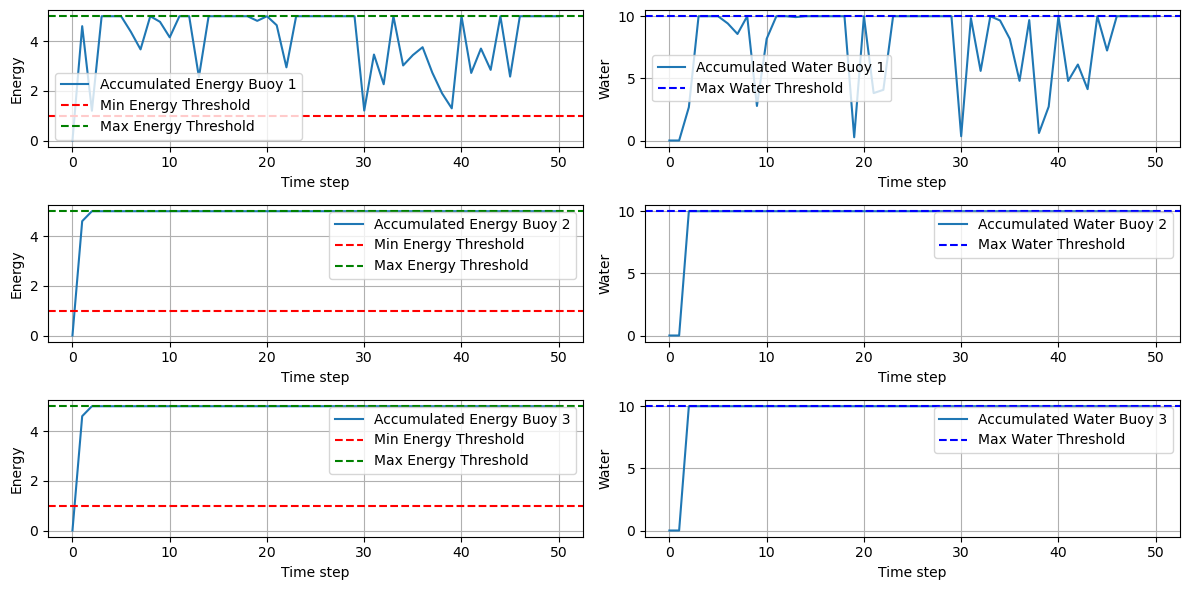

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri globali
n = 3  # numero di boe
cr = 4.6  # produzione costante di energia rinnovabile per timestep
kc = 0.05  # parametro di conversione energia-acqua
timesteps = 50  # durata della simulazione
initial_energy = 0  # livello iniziale di energia
initial_water = 0  # livello iniziale di acqua
max_energy = 5  # energia massima accumulabile
min_energy = 0.2 * max_energy  # 20% del totale dell'energia accumulabile
max_water = 10  # acqua massima accumulabile
x2_target = 10  # livello target dell'acqua (usato nelle condizioni)
max_vessels = 2  # numero massimo di natanti che possono arrivare in ciascun timestep

# Funzione per inizializzare i vettori di stato
def initialize_state_vectors(n, timesteps, initial_energy, initial_water):
    x1 = np.zeros((n, timesteps + 1))  # energia accumulata per ciascuna boa
    x2 = np.zeros((n, timesteps + 1))  # acqua accumulata per ciascuna boa
    x1[:, 0] = initial_energy
    x2[:, 0] = initial_water
    return x1, x2

# Funzione per generare richieste randomiche
def generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water):
    u1 = np.zeros((max_vessels, timesteps + 1))  # energia richiesta da ciascun natante
    u2 = np.zeros((max_vessels, timesteps + 1))  # acqua richiesta da ciascun natante
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        num_vessels = np.random.randint(0, max_vessels)  # numero di natanti al timestep k
        for i in range(num_vessels):
            max_possible_energy_request = max_energy - min_energy
            u1[i, k] = np.random.uniform(0, max_possible_energy_request)
            u2[i, k] = np.random.uniform(0, max_water)
    return u1, u2

# Funzione per aggiornare lo stato delle boe
def update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water):
    for i in range(n):
        if x1[i, k] / kc < (x2_target - x2[i, k]):
            # Caso 1: La batteria non ricarica completamente il serbatoio
            x1[i, k + 1] = cr
            x2[i, k + 1] = x2[i, k] + (x1[i, k] / kc)
        else:
            # Caso 2: La batteria ricarica completamente il serbatoio
            x1[i, k + 1] = x1[i, k] + cr - kc * (x2_target - x2[i, k])
            x2[i, k + 1] = x2_target

        # Assicura che l'energia non superi il massimo
        if x1[i, k + 1] > max_energy:
            x1[i, k + 1] = max_energy

        # Assicura che l'acqua non superi il limite massimo
        if x2[i, k + 1] > max_water:
            x2[i, k + 1] = max_water
    return x1, x2

# Funzione per assegnare le richieste dei natanti alle boe
def assign_requests(x1, x2, u1, u2, k, num_vessels, min_energy, max_energy, max_water):
    for i in range(num_vessels):
        assigned = False
        for j in range(n):
            if (x1[j, k + 1] - u1[i, k] >= min_energy and x1[j, k + 1] - u1[i, k] <= max_energy and
                x2[j, k + 1] - u2[i, k] >= 0 and x2[j, k + 1] - u2[i, k] <= max_water):
                # Assegna la richiesta alla boa j
                x1[j, k + 1] -= u1[i, k]
                x2[j, k + 1] -= u2[i, k]

                # Assicura che l'energia non scenda sotto la soglia minima
                if x1[j, k + 1] < min_energy:
                    x1[j, k + 1] = min_energy

                # Assicura che l'acqua non scenda sotto 0
                if x2[j, k + 1] < 0:
                    x2[j, k + 1] = 0

                # Stampa le richieste e le risorse aggiornate per la boa assegnata
                print(f"Vessel {i + 1} assigned to Buoy {j + 1}:")
                print(f"  Energy requested: {u1[i, k]}")
                print(f"  Water requested: {u2[i, k]}")
                print(f"  Updated energy for Buoy {j + 1}: {x1[j, k + 1]}")
                print(f"  Updated water for Buoy {j + 1}: {x2[j, k + 1]}")
                assigned = True
                break
        
        if not assigned:
            print(f"Vessel {i + 1} could not be assigned at time step {k + 1}")

# Funzione per eseguire la simulazione
def run_simulation(n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels):
    x1, x2 = initialize_state_vectors(n, timesteps, initial_energy, initial_water)
    u1, u2 = generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water)

    for k in range(timesteps):
        print(f"Time step {k + 1}")
        num_vessels = np.random.randint(1, max_vessels + 1)  # numero di natanti al timestep k
        x1, x2 = update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water)
        assign_requests(x1, x2, u1, u2, k, num_vessels, min_energy, max_energy, max_water)
        print("\n")

    return x1, x2

# Funzione per visualizzare i risultati
def plot_results(x1, x2, n, timesteps, min_energy, max_energy, max_water):
    plt.figure(figsize=(12, 6))

    for i in range(n):
        plt.subplot(n, 2, 2 * i + 1)
        plt.plot(x1[i], label=f'Accumulated Energy Buoy {i+1}')
        plt.axhline(min_energy, color='r', linestyle='--', label='Min Energy Threshold')
        plt.axhline(max_energy, color='g', linestyle='--', label='Max Energy Threshold')
        plt.xlabel('Time step')
        plt.ylabel('Energy')
        plt.legend()
        plt.grid(True)

        plt.subplot(n, 2, 2 * i + 2)
        plt.plot(x2[i], label=f'Accumulated Water Buoy {i+1}')
        plt.axhline(max_water, color='b', linestyle='--', label='Max Water Threshold')
        plt.xlabel('Time step')
        plt.ylabel('Water')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Esegui la simulazione
x1, x2 = run_simulation(n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels)

# Visualizza i risultati
plot_results(x1, x2, n, timesteps, min_energy, max_energy, max_water)


## Simulation with 3 AS with hourly rates and unloaded buoys:
* 02:00 - 05:00: Zero installments (0)
* 06:00 - 10:00: Low rate (1 to max_vessels // 3).
* 10:00 - 18:00: Rate high (1 to max_vessels).
* 18:00 - 22:00: Low rate (1 to max_vessels // 3).
* 22.00 - 6.00: Rate almost zero (0 to 1).

Where each instant k is equal to one hour.

Time step 1


Time step 2
Vessel 1 could not be assigned at time step 2


Time step 3


Time step 4


Time step 5


Time step 6
Vessel 1 assigned to Buoy 1 in System 1:
  Energy requested: 2.9279757672456204
  Water requested: 5.986584841970366
  Updated energy for Buoy 1 in System 1: 2.0720242327543796
  Updated water for Buoy 1 in System 1: 4.013415158029634


Time step 7
Vessel 1 assigned to Buoy 1 in System 1:
  Energy requested: 0.6240745617697461
  Water requested: 1.5599452033620265
  Updated energy for Buoy 1 in System 1: 4.375925438230254
  Updated water for Buoy 1 in System 1: 8.440054796637973
Vessel 2 assigned to Buoy 2 in System 1:
  Energy requested: 0.23233444867279784
  Water requested: 8.661761457749352
  Updated energy for Buoy 2 in System 1: 4.767665551327202
  Updated water for Buoy 2 in System 1: 1.3382385422506484
Vessel 3 assigned to Buoy 1 in System 1:
  Energy requested: 2.404460046972835
  Water requested: 7.080725777960454
  Updated energy for Buoy 1 in Syste

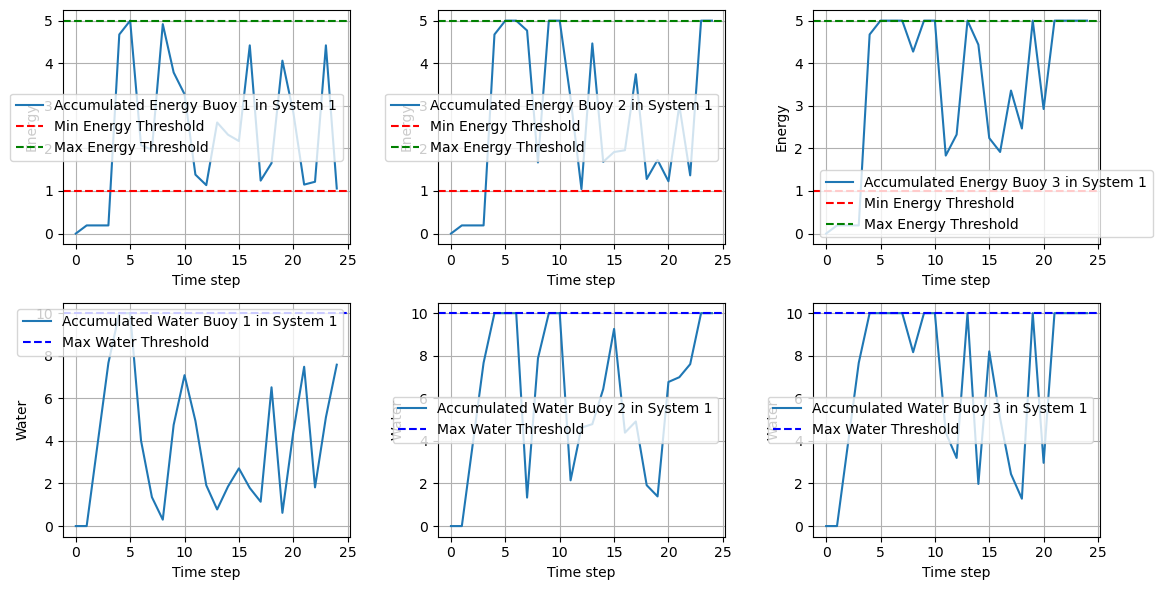

--------------------------------------------------------------------------------------------------------------


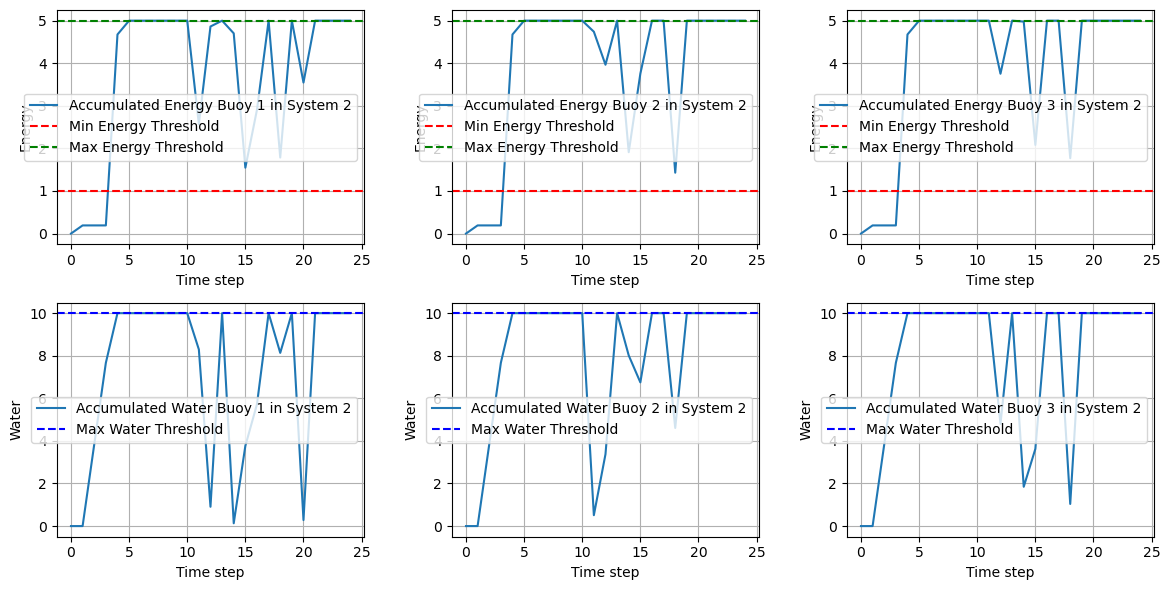

--------------------------------------------------------------------------------------------------------------


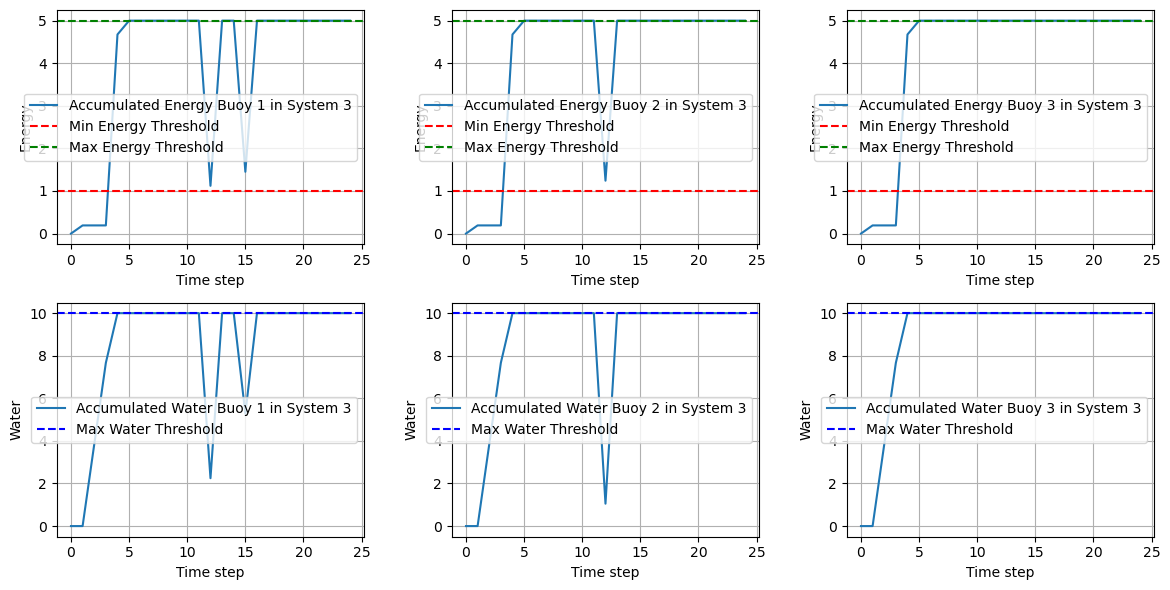

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri globali
num_autonomous_systems = 3  # numero di sistemi di boe autonomi
n = 3  # numero di boe per ciascun sistema
cr = 4.6  # produzione costante di energia rinnovabile per timestep
kc = 0.05  # parametro di conversione energia-acqua
timesteps = 24  # durata della simulazione in ore
initial_energy = 0  # livello iniziale di energia
initial_water = 0  # livello iniziale di acqua
max_energy = 5  # energia massima accumulabile
min_energy = 0.2 * max_energy  # 20% del totale dell'energia accumulabile
max_water = 10  # acqua massima accumulabile
x2_target = 10  # livello target dell'acqua (usato nelle condizioni)
max_vessels = 10  # numero massimo di natanti che possono arrivare in ciascun timestep

# Funzione per inizializzare i vettori di stato
def initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water):
    systems = []
    for _ in range(num_autonomous_systems):
        x1 = np.zeros((n, timesteps + 1))  # energia accumulata per ciascuna boa
        x2 = np.zeros((n, timesteps + 1))  # acqua accumulata per ciascuna boa
        x1[:, 0] = initial_energy
        x2[:, 0] = initial_water
        systems.append((x1, x2))
    return systems

# Funzione per generare il numero di natanti per ciascun timestep
def generate_num_vessels_per_timestep(timesteps, max_vessels):
    num_vessels = np.zeros(timesteps, dtype=int)
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        if 5 <= k < 10:
            num_vessels[k] = np.random.randint(1, max_vessels // 3 + 1)  # Rate basso
        elif 10 <= k < 18:
            num_vessels[k] = np.random.randint(1, max_vessels + 1)  # Rate alto
        elif 18 <= k < 22:
            num_vessels[k] = np.random.randint(1, max_vessels // 2 + 1)  # Rate basso
        elif 2 <= k < 5:
            num_vessels[k] = 0  # Rate nullo
        else:
            num_vessels[k] = np.random.randint(0, 2)  # Rate quasi nullo

    return num_vessels

# Funzione per generare richieste randomiche
def generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels):
    u1 = np.zeros((max_vessels, timesteps + 1))  # energia richiesta da ciascun natante
    u2 = np.zeros((max_vessels, timesteps + 1))  # acqua richiesta da ciascun natante
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        for i in range(num_vessels[k]):
            max_possible_energy_request = max_energy - min_energy
            u1[i, k] = np.random.uniform(0, max_possible_energy_request)
            u2[i, k] = np.random.uniform(0, max_water)
    return u1, u2

# Funzione per aggiornare lo stato delle boe
def update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water):
    for i in range(n):
        if x1[i, k] / kc < (x2_target - x2[i, k]):
            # Caso 1: La batteria non ricarica completamente il serbatoio
            x1[i, k + 1] = cr/24
            x2[i, k + 1] = x2[i, k] + (x1[i, k] / kc)
        else:
            # Caso 2: La batteria ricarica completamente il serbatoio
            x1[i, k + 1] = x1[i, k] + cr - kc * (x2_target - x2[i, k])
            x2[i, k + 1] = x2_target

        # Assicura che l'energia non superi il massimo
        if x1[i, k + 1] > max_energy:
            x1[i, k + 1] = max_energy

        # Assicura che l'acqua non superi il limite massimo
        if x2[i, k + 1] > max_water:
            x2[i, k + 1] = max_water
    return x1, x2

# Funzione per assegnare le richieste dei natanti ai sistemi di boe
def assign_requests_to_systems(systems, u1, u2, k, num_vessels, min_energy, max_energy, max_water):
    for i in range(num_vessels):
        assigned = False
        for system_index, (x1, x2) in enumerate(systems):
            for j in range(n):
                if (x1[j, k + 1] - u1[i, k] >= min_energy and x1[j, k + 1] - u1[i, k] <= max_energy and
                    x2[j, k + 1] - u2[i, k] >= 0 and x2[j, k + 1] - u2[i, k] <= max_water):
                    # Assegna la richiesta alla boa j del sistema system_index
                    x1[j, k + 1] -= u1[i, k]
                    x2[j, k + 1] -= u2[i, k]

                    # Assicura che l'energia non scenda sotto la soglia minima
                    if x1[j, k + 1] < min_energy:
                        x1[j, k + 1] = min_energy

                    # Assicura che l'acqua non scenda sotto 0
                    if x2[j, k + 1] < 0:
                        x2[j, k + 1] = 0

                    # Stampa le richieste e le risorse aggiornate per la boa assegnata
                    print(f"Vessel {i + 1} assigned to Buoy {j + 1} in System {system_index + 1}:")
                    print(f"  Energy requested: {u1[i, k]}")
                    print(f"  Water requested: {u2[i, k]}")
                    print(f"  Updated energy for Buoy {j + 1} in System {system_index + 1}: {x1[j, k + 1]}")
                    print(f"  Updated water for Buoy {j + 1} in System {system_index + 1}: {x2[j, k + 1]}")
                    assigned = True
                    break
            if assigned:
                break
        
        if not assigned:
            print(f"Vessel {i + 1} could not be assigned at time step {k + 1}")

# Funzione per eseguire la simulazione
def run_simulation_multiple_systems(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels):
    systems = initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water)
    num_vessels = generate_num_vessels_per_timestep(timesteps, max_vessels)
    u1, u2 = generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels)

    for k in range(timesteps):
        print(f"Time step {k + 1}")

        for system_index, (x1, x2) in enumerate(systems):
            systems[system_index] = update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water)
        if num_vessels[k] > 0:
            assign_requests_to_systems(systems, u1, u2, k, num_vessels[k], min_energy, max_energy, max_water)
        print("\n")

    return systems

# Funzione per visualizzare i risultati
def plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water):
    for system_index, (x1, x2) in enumerate(systems):
        print("--------------------------------------------------------------------------------------------------------------")
        plt.figure(figsize=(12, 6))
        
        for i in range(n):
            plt.subplot(2, n, i + 1)
            plt.plot(x1[i], label=f'Accumulated Energy Buoy {i+1} in System {system_index + 1}')
            plt.axhline(min_energy, color='r', linestyle='--', label='Min Energy Threshold')
            plt.axhline(max_energy, color='g', linestyle='--', label='Max Energy Threshold')
            plt.xlabel('Time step')
            plt.ylabel('Energy')
            plt.legend()
            plt.grid(True)

            plt.subplot(2, n, i + 1 + n)
            plt.plot(x2[i], label=f'Accumulated Water Buoy {i+1} in System {system_index + 1}')
            plt.axhline(max_water, color='b', linestyle='--', label='Max Water Threshold')
            plt.xlabel('Time step')
            plt.ylabel('Water')
            plt.legend()
            plt.grid(True)

        plt.tight_layout()
        plt.show()

# Esegui la simulazione con più sistemi di boe
systems = run_simulation_multiple_systems(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels)

# Visualizza i risultati
plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water)


## Change abscissa with time values

Time step 1


Time step 2
Vessel 1 could not be assigned at time step 2


Time step 3


Time step 4


Time step 5


Time step 6
Vessel 1 assigned to Buoy 1 in System 1:
  Energy requested: 2.9279757672456204
  Water requested: 5.986584841970366
  Updated energy for Buoy 1 in System 1: 2.0720242327543796
  Updated water for Buoy 1 in System 1: 4.013415158029634


Time step 7
Vessel 1 assigned to Buoy 1 in System 1:
  Energy requested: 0.6240745617697461
  Water requested: 1.5599452033620265
  Updated energy for Buoy 1 in System 1: 4.375925438230254
  Updated water for Buoy 1 in System 1: 8.440054796637973


Time step 8
Vessel 1 assigned to Buoy 1 in System 1:
  Energy requested: 0.23233444867279784
  Water requested: 8.661761457749352
  Updated energy for Buoy 1 in System 1: 4.767665551327202
  Updated water for Buoy 1 in System 1: 1.3382385422506484


Time step 9
Vessel 1 assigned to Buoy 1 in System 1:
  Energy requested: 2.404460046972835
  Water requested: 7.080725777960454
  Update

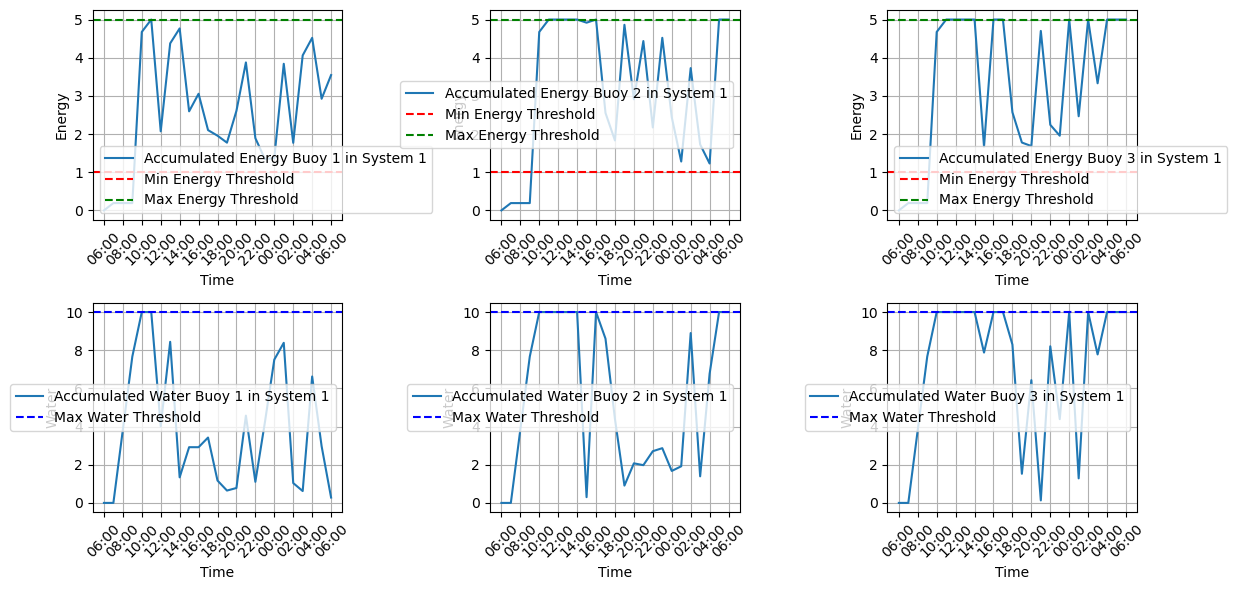

Plot saved as system_1_results.png
--------------------------------------------------------------------------------------------------------------


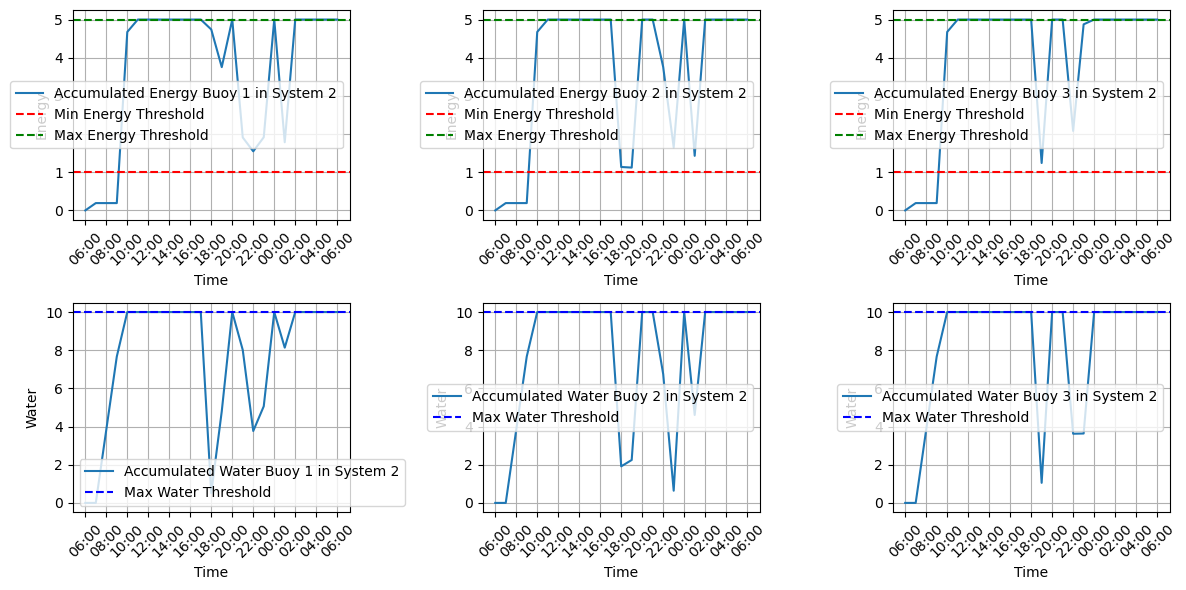

Plot saved as system_2_results.png
--------------------------------------------------------------------------------------------------------------


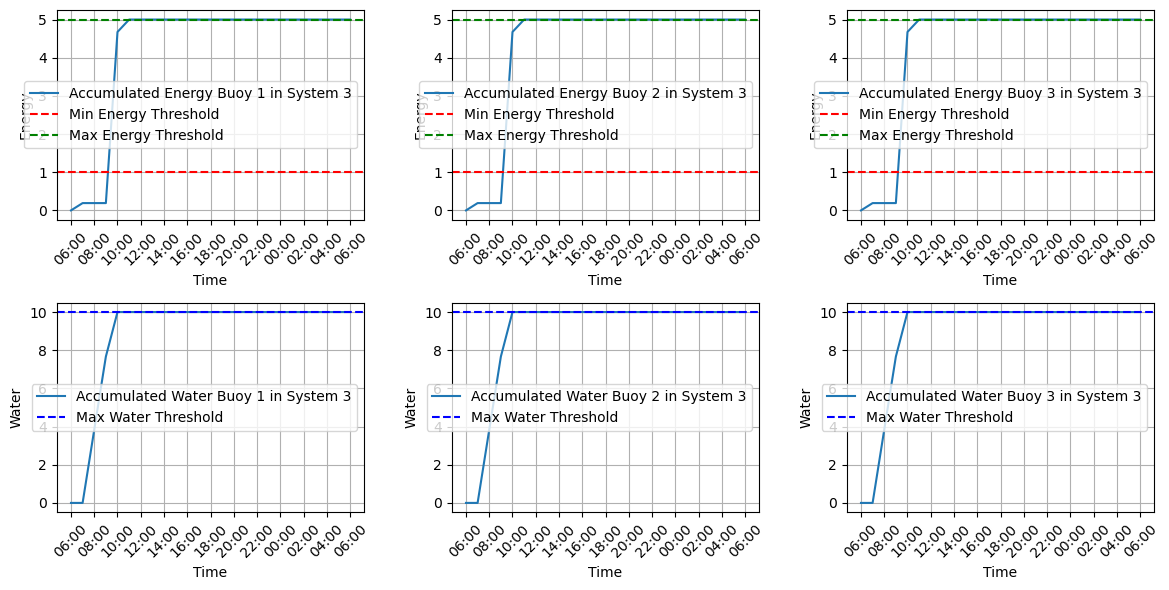

Plot saved as system_3_results.png


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parametri globali
num_autonomous_systems = 3  # numero di sistemi di boe autonomi
n = 3  # numero di boe per ciascun sistema
cr = 4.6  # produzione costante di energia rinnovabile per timestep
kc = 0.05  # parametro di conversione energia-acqua
timesteps = 24  # durata della simulazione in ore
initial_energy = 0  # livello iniziale di energia
initial_water = 0  # livello iniziale di acqua
max_energy = 5  # energia massima accumulabile
min_energy = 0.2 * max_energy  # 20% del totale dell'energia accumulabile
max_water = 10  # acqua massima accumulabile
x2_target = 10  # livello target dell'acqua (usato nelle condizioni)
max_vessels = 10  # numero massimo di natanti che possono arrivare in ciascun timestep

# Funzione per inizializzare i vettori di stato
def initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water):
    systems = []
    for _ in range(num_autonomous_systems):
        x1 = np.zeros((n, timesteps + 1))  # energia accumulata per ciascuna boa
        x2 = np.zeros((n, timesteps + 1))  # acqua accumulata per ciascuna boa
        x1[:, 0] = initial_energy
        x2[:, 0] = initial_water
        systems.append((x1, x2))
    return systems

# Funzione per generare il numero di natanti per ciascun timestep
def generate_num_vessels_per_timestep(timesteps, max_vessels):
    num_vessels = np.zeros(timesteps, dtype=int)
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        if 6 <= k < 10:
            num_vessels[k] = np.random.randint(1, max_vessels // 3 + 1)  # Rate basso
        elif 10 <= k < 18:
            num_vessels[k] = np.random.randint(1, max_vessels + 1)  # Rate alto
        elif 18 <= k < 22:
            num_vessels[k] = np.random.randint(1, max_vessels // 2 + 1)  # Rate basso
        else:
            num_vessels[k] = np.random.randint(0, 2)  # Rate quasi nullo

    return num_vessels

# Funzione per generare richieste randomiche
def generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels):
    u1 = np.zeros((max_vessels, timesteps + 1))  # energia richiesta da ciascun natante
    u2 = np.zeros((max_vessels, timesteps + 1))  # acqua richiesta da ciascun natante
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        for i in range(num_vessels[k]):
            max_possible_energy_request = max_energy - min_energy
            u1[i, k] = np.random.uniform(0, max_possible_energy_request)
            u2[i, k] = np.random.uniform(0, max_water)
    return u1, u2

# Funzione per aggiornare lo stato delle boe
def update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water):
    for i in range(n):
        if x1[i, k] / kc < (x2_target - x2[i, k]):
            # Caso 1: La batteria non ricarica completamente il serbatoio
            x1[i, k + 1] = cr/24
            x2[i, k + 1] = x2[i, k] + (x1[i, k] / kc)
        else:
            # Caso 2: La batteria ricarica completamente il serbatoio
            x1[i, k + 1] = x1[i, k] + cr - kc * (x2_target - x2[i, k])
            x2[i, k + 1] = x2_target

        # Assicura che l'energia non superi il massimo
        if x1[i, k + 1] > max_energy:
            x1[i, k + 1] = max_energy

        # Assicura che l'acqua non superi il limite massimo
        if x2[i, k + 1] > max_water:
            x2[i, k + 1] = max_water
    return x1, x2

# Funzione per assegnare le richieste dei natanti ai sistemi di boe
def assign_requests_to_systems(systems, u1, u2, k, num_vessels, min_energy, max_energy, max_water):
    for i in range(num_vessels):
        assigned = False
        for system_index, (x1, x2) in enumerate(systems):
            for j in range(n):
                if (x1[j, k + 1] - u1[i, k] >= min_energy and x1[j, k + 1] - u1[i, k] <= max_energy and
                    x2[j, k + 1] - u2[i, k] >= 0 and x2[j, k + 1] - u2[i, k] <= max_water):
                    # Assegna la richiesta alla boa j del sistema system_index
                    x1[j, k + 1] -= u1[i, k]
                    x2[j, k + 1] -= u2[i, k]

                    # Assicura che l'energia non scenda sotto la soglia minima
                    if x1[j, k + 1] < min_energy:
                        x1[j, k + 1] = min_energy

                    # Assicura che l'acqua non scenda sotto 0
                    if x2[j, k + 1] < 0:
                        x2[j, k + 1] = 0

                    # Stampa le richieste e le risorse aggiornate per la boa assegnata
                    print(f"Vessel {i + 1} assigned to Buoy {j + 1} in System {system_index + 1}:")
                    print(f"  Energy requested: {u1[i, k]}")
                    print(f"  Water requested: {u2[i, k]}")
                    print(f"  Updated energy for Buoy {j + 1} in System {system_index + 1}: {x1[j, k + 1]}")
                    print(f"  Updated water for Buoy {j + 1} in System {system_index + 1}: {x2[j, k + 1]}")
                    assigned = True
                    break
            if assigned:
                break
        
        if not assigned:
            print(f"Vessel {i + 1} could not be assigned at time step {k + 1}")

# Funzione per eseguire la simulazione
def run_simulation_multiple_systems(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels):
    systems = initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water)
    num_vessels = generate_num_vessels_per_timestep(timesteps, max_vessels)
    u1, u2 = generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels)

    for k in range(timesteps):
        print(f"Time step {k + 1}")

        for system_index, (x1, x2) in enumerate(systems):
            systems[system_index] = update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water)
        if num_vessels[k] > 0:
            assign_requests_to_systems(systems, u1, u2, k, num_vessels[k], min_energy, max_energy, max_water)
        print("\n")

    return systems

# Funzione per visualizzare e salvare i risultati
def plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water):
    time_labels = [f"{(6 + i) % 24:02d}:00" for i in range(timesteps + 1)]
    
    for system_index, (x1, x2) in enumerate(systems):
        print("--------------------------------------------------------------------------------------------------------------")
        plt.figure(figsize=(12, 6))
        
        for i in range(n):
            plt.subplot(2, n, i + 1)
            plt.plot(x1[i], label=f'Accumulated Energy Buoy {i+1} in System {system_index + 1}')
            plt.axhline(min_energy, color='r', linestyle='--', label='Min Energy Threshold')
            plt.axhline(max_energy, color='g', linestyle='--', label='Max Energy Threshold')
            plt.xlabel('Time')
            plt.ylabel('Energy')
            plt.xticks(ticks=range(0, timesteps + 1, 2), labels=time_labels[::2], rotation=45)
            plt.legend()
            plt.grid(True)

            plt.subplot(2, n, i + 1 + n)
            plt.plot(x2[i], label=f'Accumulated Water Buoy {i+1} in System {system_index + 1}')
            plt.axhline(max_water, color='b', linestyle='--', label='Max Water Threshold')
            plt.xlabel('Time')
            plt.ylabel('Water')
            plt.xticks(ticks=range(0, timesteps + 1, 2), labels=time_labels[::2], rotation=45)
            plt.legend()
            plt.grid(True)

        plt.tight_layout()
        output_path = f"system_{system_index + 1}_results.png"
        plt.savefig(output_path)  # Salva il plot come file PNG
        plt.show()
        print(f"Plot saved as {output_path}")

# Esegui la simulazione con più sistemi di boe
systems = run_simulation_multiple_systems(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels)

# Visualizza e salva i risultati
plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water)


# VERSION WITH ROUND-ROBIN ASSIGNMENT

Time step 1
Vessel 1 assigned to Buoy 1:
  Energy requested: 0.0
  Water requested: 0.0
  Updated energy for Buoy 1: 4.6
  Updated water for Buoy 1: 0.0


Time step 2
Vessel 1 assigned to Buoy 2:
  Energy requested: 3.8028572256396647
  Water requested: 7.319939418114051
  Updated energy for Buoy 2: 1.1971427743603353
  Updated water for Buoy 2: 2.6800605818859493


Time step 3
Vessel 1 assigned to Buoy 3:
  Energy requested: 0.0
  Water requested: 0.0
  Updated energy for Buoy 3: 5.0
  Updated water for Buoy 3: 10.0
Vessel 2 assigned to Buoy 1:
  Energy requested: 0.0
  Water requested: 0.0
  Updated energy for Buoy 1: 5.0
  Updated water for Buoy 1: 10.0


Time step 4
Vessel 1 assigned to Buoy 2:
  Energy requested: 0.0
  Water requested: 0.0
  Updated energy for Buoy 2: 5.0
  Updated water for Buoy 2: 10.0


Time step 5
Vessel 1 assigned to Buoy 3:
  Energy requested: 0.0
  Water requested: 0.0
  Updated energy for Buoy 3: 5.0
  Updated water for Buoy 3: 10.0
Vessel 2 assigned to Bu

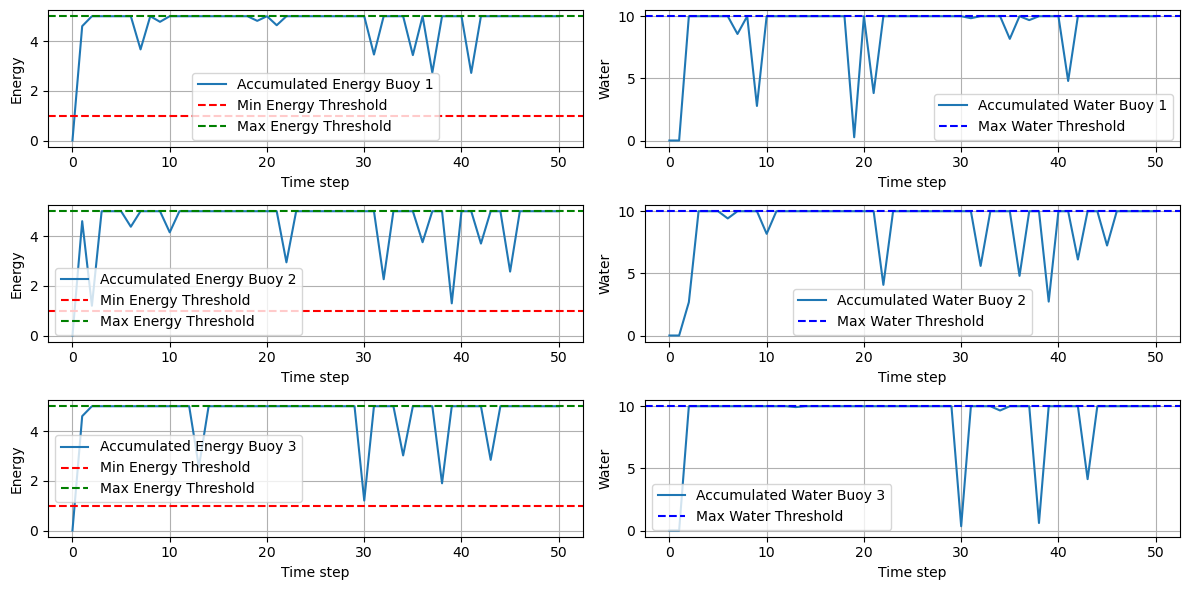

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri globali
n = 3  # numero di boe
cr = 4.6  # produzione costante di energia rinnovabile per timestep
kc = 0.05  # parametro di conversione energia-acqua
timesteps = 50  # durata della simulazione
initial_energy = 0  # livello iniziale di energia
initial_water = 0  # livello iniziale di acqua
max_energy = 5  # energia massima accumulabile
min_energy = 0.2 * max_energy  # 20% del totale dell'energia accumulabile
max_water = 10  # acqua massima accumulabile
x2_target = 10  # livello target dell'acqua (usato nelle condizioni)
max_vessels = 2  # numero massimo di natanti che possono arrivare in ciascun timestep

# Funzione per inizializzare i vettori di stato
def initialize_state_vectors(n, timesteps, initial_energy, initial_water):
    x1 = np.zeros((n, timesteps + 1))  # energia accumulata per ciascuna boa
    x2 = np.zeros((n, timesteps + 1))  # acqua accumulata per ciascuna boa
    x1[:, 0] = initial_energy
    x2[:, 0] = initial_water
    return x1, x2

# Funzione per generare richieste randomiche
def generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water):
    u1 = np.zeros((max_vessels, timesteps + 1))  # energia richiesta da ciascun natante
    u2 = np.zeros((max_vessels, timesteps + 1))  # acqua richiesta da ciascun natante
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        num_vessels = np.random.randint(0, max_vessels)  # numero di natanti al timestep k
        for i in range(num_vessels):
            max_possible_energy_request = max_energy - min_energy
            u1[i, k] = np.random.uniform(0, max_possible_energy_request)
            u2[i, k] = np.random.uniform(0, max_water)
    return u1, u2

# Funzione per aggiornare lo stato delle boe
def update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water):
    for i in range(n):
        if x1[i, k] / kc < (x2_target - x2[i, k]):
            # Caso 1: La batteria non ricarica completamente il serbatoio
            x1[i, k + 1] = cr
            x2[i, k + 1] = x2[i, k] + (x1[i, k] / kc)
        else:
            # Caso 2: La batteria ricarica completamente il serbatoio
            x1[i, k + 1] = x1[i, k] + cr - kc * (x2_target - x2[i, k])
            x2[i, k + 1] = x2_target

        # Assicura che l'energia non superi il massimo
        if x1[i, k + 1] > max_energy:
            x1[i, k + 1] = max_energy

        # Assicura che l'acqua non superi il limite massimo
        if x2[i, k + 1] > max_water:
            x2[i, k + 1] = max_water
    return x1, x2

# Funzione per assegnare le richieste dei natanti alle boe utilizzando round robin
def assign_requests_round_robin(x1, x2, u1, u2, k, num_vessels, min_energy, max_energy, max_water, last_assigned_buoy):
    for i in range(num_vessels):
        assigned = False
        for _ in range(n):
            j = (last_assigned_buoy + 1) % n
            if (x1[j, k + 1] - u1[i, k] >= min_energy and x1[j, k + 1] - u1[i, k] <= max_energy and
                x2[j, k + 1] - u2[i, k] >= 0 and x2[j, k + 1] - u2[i, k] <= max_water):
                # Assegna la richiesta alla boa j
                x1[j, k + 1] -= u1[i, k]
                x2[j, k + 1] -= u2[i, k]

                # Assicura che l'energia non scenda sotto la soglia minima
                if x1[j, k + 1] < min_energy:
                    x1[j, k + 1] = min_energy

                # Assicura che l'acqua non scenda sotto 0
                if x2[j, k + 1] < 0:
                    x2[j, k + 1] = 0

                # Stampa le richieste e le risorse aggiornate per la boa assegnata
                print(f"Vessel {i + 1} assigned to Buoy {j + 1}:")
                print(f"  Energy requested: {u1[i, k]}")
                print(f"  Water requested: {u2[i, k]}")
                print(f"  Updated energy for Buoy {j + 1}: {x1[j, k + 1]}")
                print(f"  Updated water for Buoy {j + 1}: {x2[j, k + 1]}")
                assigned = True
                last_assigned_buoy = j
                break
        
        if not assigned:
            print(f"Vessel {i + 1} could not be assigned at time step {k + 1}")
    
    return last_assigned_buoy

# Funzione per eseguire la simulazione
def run_simulation_round_robin(n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels):
    x1, x2 = initialize_state_vectors(n, timesteps, initial_energy, initial_water)
    u1, u2 = generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water)
    last_assigned_buoy = -1  # inizializza l'ultima boa assegnata

    for k in range(timesteps):
        print(f"Time step {k + 1}")
        num_vessels = np.random.randint(1, max_vessels + 1)  # numero di natanti al timestep k
        x1, x2 = update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water)
        last_assigned_buoy = assign_requests_round_robin(x1, x2, u1, u2, k, num_vessels, min_energy, max_energy, max_water, last_assigned_buoy)
        print("\n")

    return x1, x2

# Funzione per visualizzare i risultati
def plot_results(x1, x2, n, timesteps, min_energy, max_energy, max_water):
    plt.figure(figsize=(12, 6))

    for i in range(n):
        plt.subplot(n, 2, 2 * i + 1)
        plt.plot(x1[i], label=f'Accumulated Energy Buoy {i+1}')
        plt.axhline(min_energy, color='r', linestyle='--', label='Min Energy Threshold')
        plt.axhline(max_energy, color='g', linestyle='--', label='Max Energy Threshold')
        plt.xlabel('Time step')
        plt.ylabel('Energy')
        plt.legend()
        plt.grid(True)

        plt.subplot(n, 2, 2 * i + 2)
        plt.plot(x2[i], label=f'Accumulated Water Buoy {i+1}')
        plt.axhline(max_water, color='b', linestyle='--', label='Max Water Threshold')
        plt.xlabel('Time step')
        plt.ylabel('Water')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Esegui la simulazione con assegnazione round robin
x1, x2 = run_simulation_round_robin(n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels)

# Visualizza i risultati
plot_results(x1, x2, n, timesteps, min_energy, max_energy, max_water)


## Simulation with 3 AS with round robin assignment with hourly installments (unloaded buoys):
* 02:00 - 05:00: Zero installments (0)
* 06:00 - 10:00: Low rate (1 to max_vessels // 3).
* 10:00 - 18:00: Rate high (1 to max_vessels).
* 18:00 - 22:00: Low rate (1 to max_vessels // 3).
* 22.00 - 6.00: Rate almost zero (0 to 1).

Where each instant k is equal to one hour.

Time step 1


Time step 2
Vessel 1 arriving:
  Energy requested: 1.49816047538945
  Water requested: 9.50714306409916
Vessel 1 could not be assigned at time step 2


Time step 3


Time step 4


Time step 5


Time step 6
Vessel 1 arriving:
  Energy requested: 2.9279757672456204
  Water requested: 5.986584841970366
Vessel 1 assigned to Buoy 1 in System 3:
  Energy requested: 2.9279757672456204
  Water requested: 5.986584841970366
  Updated energy for Buoy 1 in System 3: 2.0720242327543796
  Updated water for Buoy 1 in System 3: 4.013415158029634


Time step 7
Vessel 1 arriving:
  Energy requested: 0.6240745617697461
  Water requested: 1.5599452033620265
Vessel 2 arriving:
  Energy requested: 0.23233444867279784
  Water requested: 8.661761457749352
Vessel 3 arriving:
  Energy requested: 2.404460046972835
  Water requested: 7.080725777960454
Vessel 1 assigned to Buoy 2 in System 3:
  Energy requested: 0.6240745617697461
  Water requested: 1.5599452033620265
  Updated energy for Buoy 2 in S

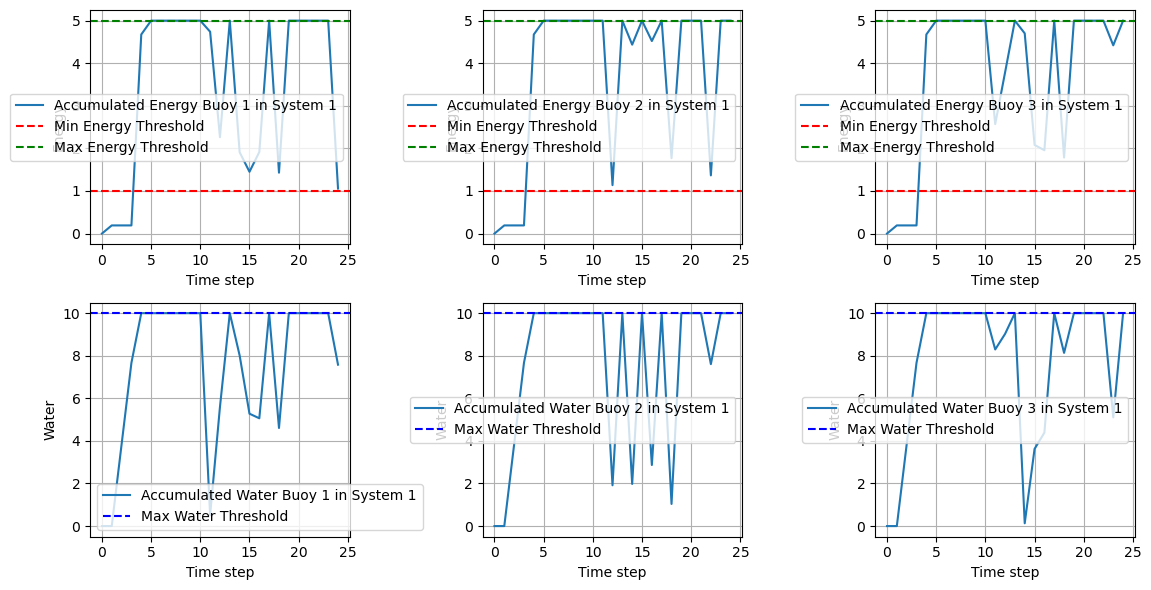

--------------------------------------------------------------------------------------------------------------


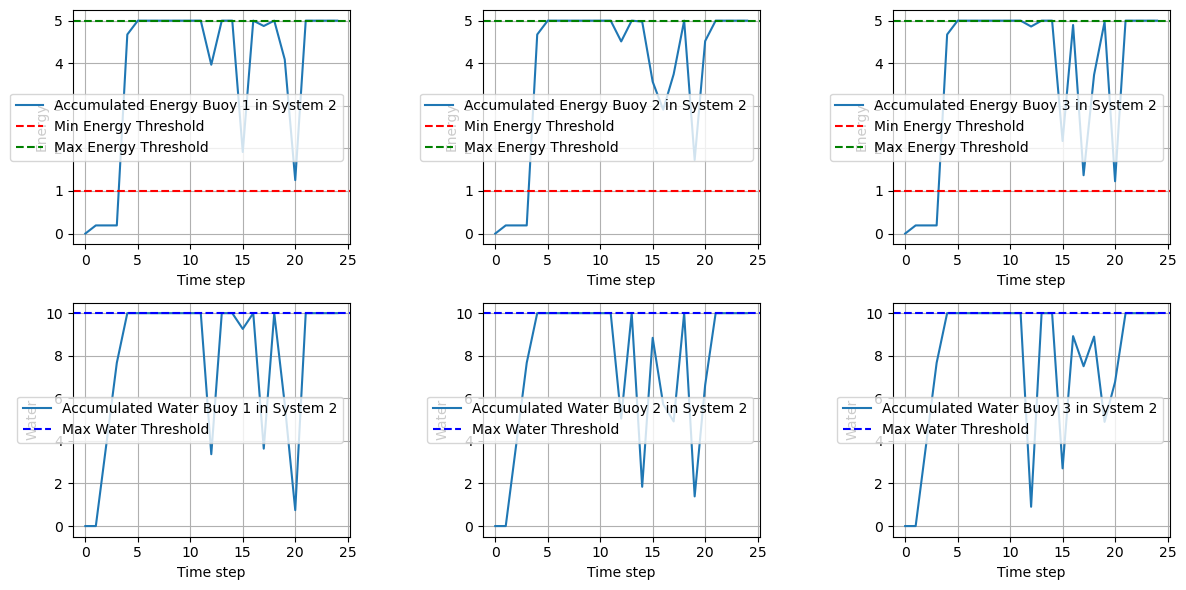

--------------------------------------------------------------------------------------------------------------


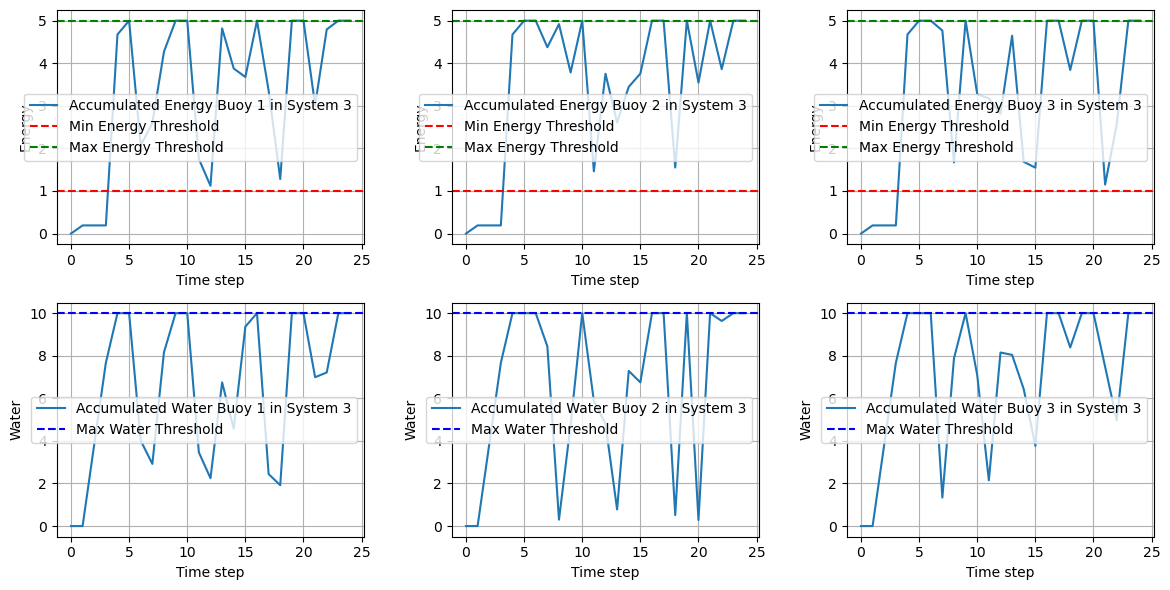

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri globali
num_autonomous_systems = 3  # numero di sistemi di boe autonomi
n = 3  # numero di boe per ciascun sistema
cr = 4.6  # produzione costante di energia rinnovabile per timestep
kc = 0.05  # parametro di conversione energia-acqua
timesteps = 24  # durata della simulazione in ore
initial_energy = 0  # livello iniziale di energia
initial_water = 0  # livello iniziale di acqua
max_energy = 5  # energia massima accumulabile
min_energy = 0.2 * max_energy  # 20% del totale dell'energia accumulabile
max_water = 10  # acqua massima accumulabile
x2_target = 10  # livello target dell'acqua (usato nelle condizioni)
max_vessels = 10  # numero massimo di natanti che possono arrivare in ciascun timestep

# Funzione per inizializzare i vettori di stato
def initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water):
    systems = []
    for _ in range(num_autonomous_systems):
        x1 = np.zeros((n, timesteps + 1))  # energia accumulata per ciascuna boa
        x2 = np.zeros((n, timesteps + 1))  # acqua accumulata per ciascuna boa
        x1[:, 0] = initial_energy
        x2[:, 0] = initial_water
        systems.append((x1, x2))
    return systems

# Funzione per generare il numero di natanti per ciascun timestep
def generate_num_vessels_per_timestep(timesteps, max_vessels):
    num_vessels = np.zeros(timesteps, dtype=int)
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        if 5 <= k < 10:
            num_vessels[k] = np.random.randint(1, max_vessels // 3 + 1)  # Rate basso
        elif 10 <= k < 18:
            num_vessels[k] = np.random.randint(1, max_vessels + 1)  # Rate alto
        elif 18 <= k < 22:
            num_vessels[k] = np.random.randint(1, max_vessels // 2 + 1)  # Rate basso
        elif 2 <= k < 5:
            num_vessels[k] = 0  # Rate nullo
        else:
            num_vessels[k] = np.random.randint(0, 2)  # Rate quasi nullo

    return num_vessels

# Funzione per generare richieste randomiche
def generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels):
    u1 = np.zeros((max_vessels, timesteps + 1))  # energia richiesta da ciascun natante
    u2 = np.zeros((max_vessels, timesteps + 1))  # acqua richiesta da ciascun natante
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        for i in range(num_vessels[k]):
            max_possible_energy_request = max_energy - min_energy
            u1[i, k] = np.random.uniform(0, max_possible_energy_request)
            u2[i, k] = np.random.uniform(0, max_water)
    return u1, u2

# Funzione per aggiornare lo stato delle boe
def update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water):
    for i in range(n):
        if x1[i, k] / kc < (x2_target - x2[i, k]):
            # Caso 1: La batteria non ricarica completamente il serbatoio
            x1[i, k + 1] = cr/24
            x2[i, k + 1] = x2[i, k] + (x1[i, k] / kc)
        else:
            # Caso 2: La batteria ricarica completamente il serbatoio
            x1[i, k + 1] = x1[i, k] + cr - kc * (x2_target - x2[i, k])
            x2[i, k + 1] = x2_target

        # Assicura che l'energia non superi il massimo
        if x1[i, k + 1] > max_energy:
            x1[i, k + 1] = max_energy

        # Assicura che l'acqua non superi il limite massimo
        if x2[i, k + 1] > max_water:
            x2[i, k + 1] = max_water
    return x1, x2

# Funzione per assegnare le richieste dei natanti alle boe utilizzando round robin
def assign_requests_round_robin(systems, u1, u2, k, num_vessels, min_energy, max_energy, max_water, last_assigned_buoy):
    for i in range(num_vessels):
        assigned = False
        initial_system = last_assigned_buoy // n  # Inizia dal sistema dell'ultima boa assegnata
        for system_offset in range(num_autonomous_systems):
            system_index = (initial_system + system_offset) % num_autonomous_systems
            x1, x2 = systems[system_index]
            for _ in range(n):
                j = (last_assigned_buoy + 1) % n
                if (x1[j, k + 1] - u1[i, k] >= min_energy and x1[j, k + 1] - u1[i, k] <= max_energy and
                    x2[j, k + 1] - u2[i, k] >= 0 and x2[j, k + 1] - u2[i, k] <= max_water):
                    # Assegna la richiesta alla boa j del sistema system_index
                    x1[j, k + 1] -= u1[i, k]
                    x2[j, k + 1] -= u2[i, k]

                    # Assicura che l'energia non scenda sotto la soglia minima
                    if x1[j, k + 1] < min_energy:
                        x1[j, k + 1] = min_energy

                    # Assicura che l'acqua non scenda sotto 0
                    if x2[j, k + 1] < 0:
                        x2[j, k + 1] = 0

                    # Stampa le richieste e le risorse aggiornate per la boa assegnata
                    print(f"Vessel {i + 1} assigned to Buoy {j + 1} in System {system_index + 1}:")
                    print(f"  Energy requested: {u1[i, k]}")
                    print(f"  Water requested: {u2[i, k]}")
                    print(f"  Updated energy for Buoy {j + 1} in System {system_index + 1}: {x1[j, k + 1]}")
                    print(f"  Updated water for Buoy {j + 1} in System {system_index + 1}: {x2[j, k + 1]}")
                    assigned = True
                    last_assigned_buoy = j + system_index * n
                    break
            if assigned:
                break
        
        if not assigned:
            print(f"Vessel {i + 1} could not be assigned at time step {k + 1}")
    
    return last_assigned_buoy

# Funzione per eseguire la simulazione
def run_simulation_round_robin(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels):
    systems = initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water)
    num_vessels = generate_num_vessels_per_timestep(timesteps, max_vessels)
    u1, u2 = generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels)
    last_assigned_buoy = -1  # inizializza l'ultima boa assegnata

    for k in range(timesteps):
        print(f"Time step {k + 1}")
        
        for system_index, (x1, x2) in enumerate(systems):
            systems[system_index] = update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water)
        
        for i in range(num_vessels[k]):
            print(f"Vessel {i + 1} arriving:")
            print(f"  Energy requested: {u1[i, k]}")
            print(f"  Water requested: {u2[i, k]}")
        
        if num_vessels[k] > 0:
            last_assigned_buoy = assign_requests_round_robin(systems, u1, u2, k, num_vessels[k], min_energy, max_energy, max_water, last_assigned_buoy)
        print("\n")

    return systems

# Funzione per visualizzare i risultati
def plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water):
    for system_index, (x1, x2) in enumerate(systems):
        print("--------------------------------------------------------------------------------------------------------------")
        plt.figure(figsize=(12, 6))
        
        for i in range(n):
            plt.subplot(2, n, i + 1)
            plt.plot(x1[i], label=f'Accumulated Energy Buoy {i+1} in System {system_index + 1}')
            plt.axhline(min_energy, color='r', linestyle='--', label='Min Energy Threshold')
            plt.axhline(max_energy, color='g', linestyle='--', label='Max Energy Threshold')
            plt.xlabel('Time step')
            plt.ylabel('Energy')
            plt.legend()
            plt.grid(True)

            plt.subplot(2, n, i + 1 + n)
            plt.plot(x2[i], label=f'Accumulated Water Buoy {i+1} in System {system_index + 1}')
            plt.axhline(max_water, color='b', linestyle='--', label='Max Water Threshold')
            plt.xlabel('Time step')
            plt.ylabel('Water')
            plt.legend()
            plt.grid(True)

        plt.tight_layout()
        plt.show()

# Esegui la simulazione con assegnazione round robin
systems = run_simulation_round_robin(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels)

# Visualizza i risultati
plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water)


## Change abscissa with time values

Time step 1


Time step 2
Vessel 1 arriving:
  Energy requested: 1.49816047538945
  Water requested: 9.50714306409916
Vessel 1 could not be assigned at time step 2


Time step 3


Time step 4


Time step 5


Time step 6
Vessel 1 arriving:
  Energy requested: 2.9279757672456204
  Water requested: 5.986584841970366
Vessel 1 assigned to Buoy 1 in System 3:
  Energy requested: 2.9279757672456204
  Water requested: 5.986584841970366
  Updated energy for Buoy 1 in System 3: 2.0720242327543796
  Updated water for Buoy 1 in System 3: 4.013415158029634


Time step 7
Vessel 1 arriving:
  Energy requested: 0.6240745617697461
  Water requested: 1.5599452033620265
Vessel 2 arriving:
  Energy requested: 0.23233444867279784
  Water requested: 8.661761457749352
Vessel 3 arriving:
  Energy requested: 2.404460046972835
  Water requested: 7.080725777960454
Vessel 1 assigned to Buoy 2 in System 3:
  Energy requested: 0.6240745617697461
  Water requested: 1.5599452033620265
  Updated energy for Buoy 2 in S

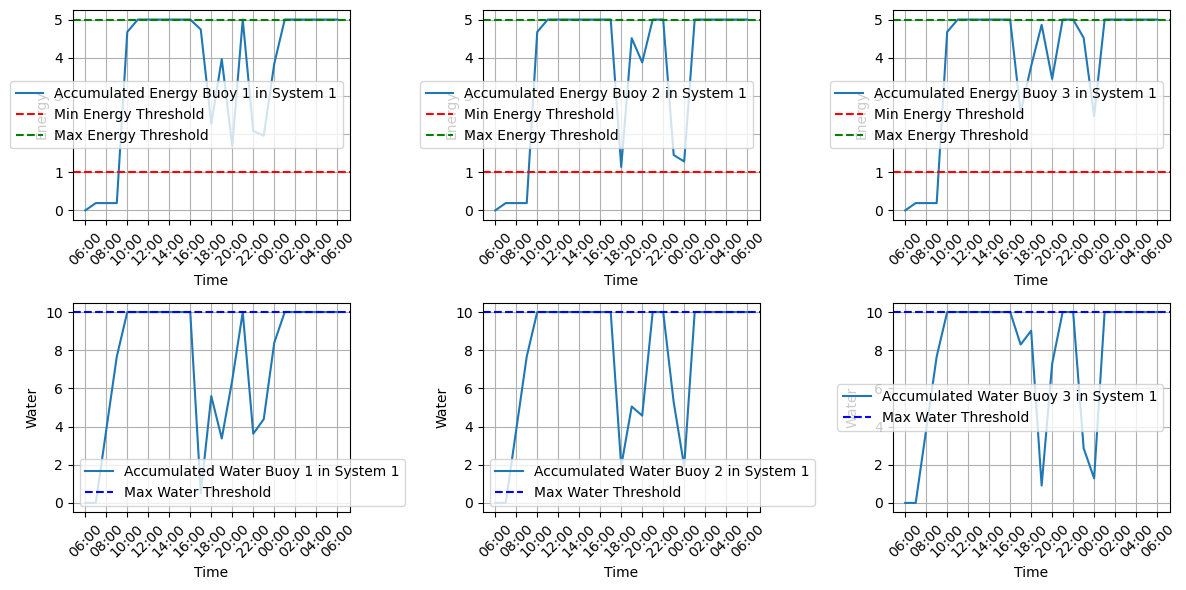

Plot saved as system_1_results.png
--------------------------------------------------------------------------------------------------------------


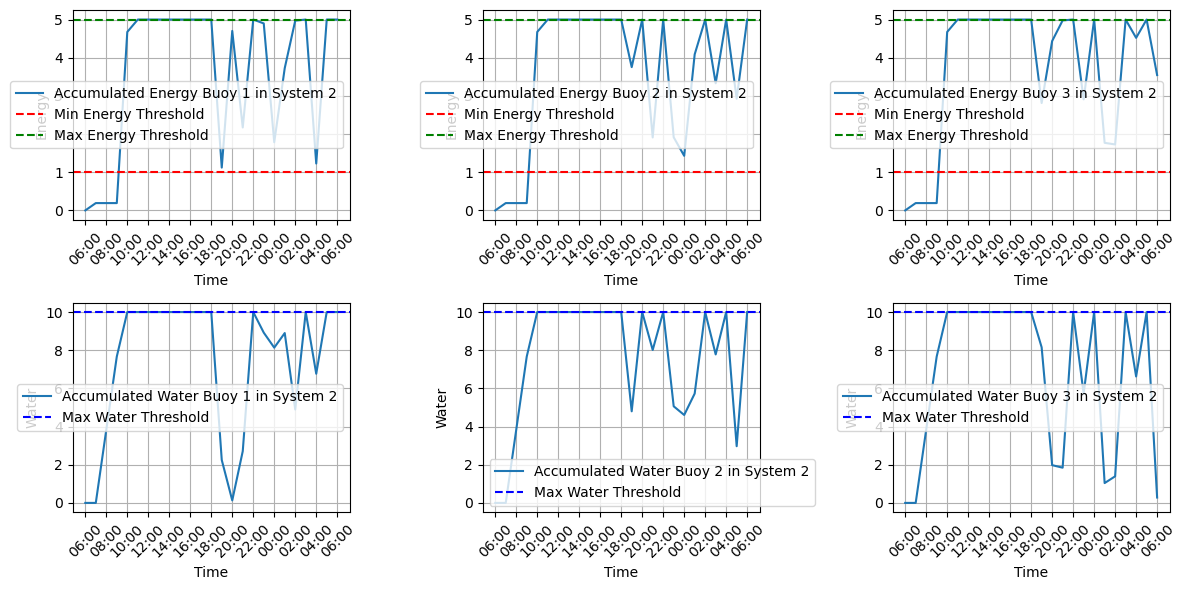

Plot saved as system_2_results.png
--------------------------------------------------------------------------------------------------------------


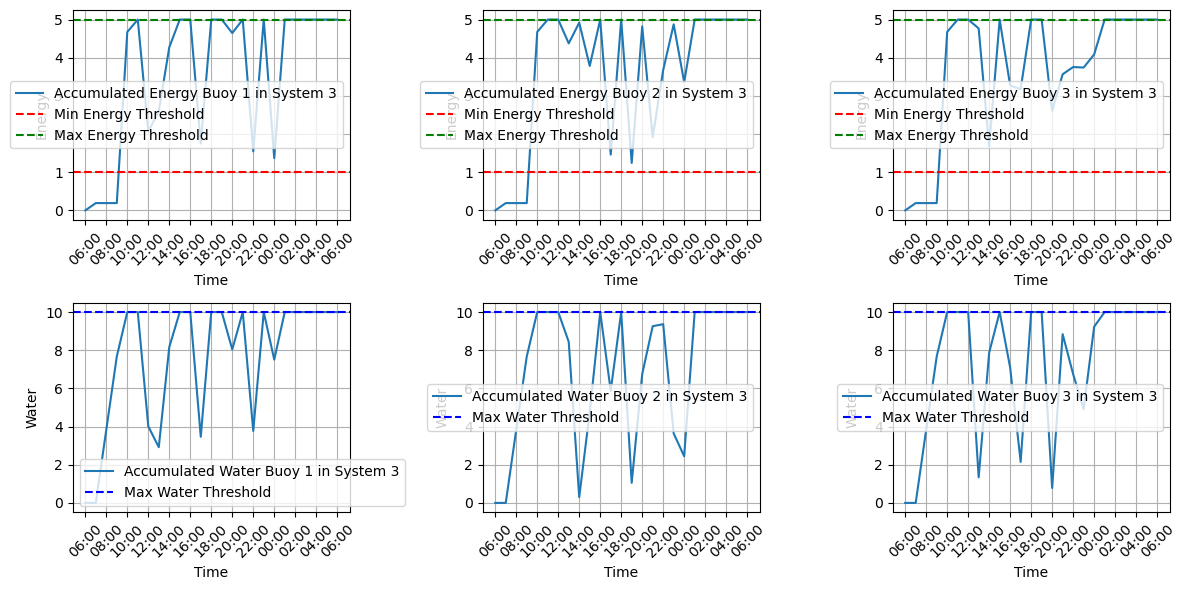

Plot saved as system_3_results.png


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Parametri globali
num_autonomous_systems = 3  # numero di sistemi di boe autonomi
n = 3  # numero di boe per ciascun sistema
cr = 4.6  # produzione costante di energia rinnovabile per timestep
kc = 0.05  # parametro di conversione energia-acqua
timesteps = 24  # durata della simulazione in ore
initial_energy = 0  # livello iniziale di energia
initial_water = 0  # livello iniziale di acqua
max_energy = 5  # energia massima accumulabile
min_energy = 0.2 * max_energy  # 20% del totale dell'energia accumulabile
max_water = 10  # acqua massima accumulabile
x2_target = 10  # livello target dell'acqua (usato nelle condizioni)
max_vessels = 9  # numero massimo di natanti che possono arrivare in ciascun timestep

# Funzione per inizializzare i vettori di stato
def initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water):
    systems = []
    for _ in range(num_autonomous_systems):
        x1 = np.zeros((n, timesteps + 1))  # energia accumulata per ciascuna boa
        x2 = np.zeros((n, timesteps + 1))  # acqua accumulata per ciascuna boa
        x1[:, 0] = initial_energy
        x2[:, 0] = initial_water
        systems.append((x1, x2))
    return systems

# Funzione per generare il numero di natanti per ciascun timestep
def generate_num_vessels_per_timestep(timesteps, max_vessels):
    num_vessels = np.zeros(timesteps, dtype=int)
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        if 5 <= k < 10:
            num_vessels[k] = np.random.randint(1, max_vessels // 3 + 1)  # Rate basso
        elif 10 <= k < 18:
            num_vessels[k] = np.random.randint(1, max_vessels + 1)  # Rate alto
        elif 18 <= k < 22:
            num_vessels[k] = np.random.randint(1, max_vessels // 2 + 1)  # Rate basso
        elif 2 <= k < 5:
            num_vessels[k] = 0  # Rate nullo
        else:
            num_vessels[k] = np.random.randint(0, 2)  # Rate quasi nullo

    return num_vessels

# Funzione per generare richieste randomiche
def generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels):
    u1 = np.zeros((max_vessels, timesteps + 1))  # energia richiesta da ciascun natante
    u2 = np.zeros((max_vessels, timesteps + 1))  # acqua richiesta da ciascun natante
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        for i in range(num_vessels[k]):
            max_possible_energy_request = max_energy - min_energy
            u1[i, k] = np.random.uniform(0, max_possible_energy_request)
            u2[i, k] = np.random.uniform(0, max_water)
    return u1, u2

# Funzione per aggiornare lo stato delle boe
def update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water):
    for i in range(n):
        if x1[i, k] / kc < (x2_target - x2[i, k]):
            # Caso 1: La batteria non ricarica completamente il serbatoio
            x1[i, k + 1] = cr/24
            x2[i, k + 1] = x2[i, k] + (x1[i, k] / kc)
        else:
            # Caso 2: La batteria ricarica completamente il serbatoio
            x1[i, k + 1] = x1[i, k] + cr - kc * (x2_target - x2[i, k])
            x2[i, k + 1] = x2_target

        # Assicura che l'energia non superi il massimo
        if x1[i, k + 1] > max_energy:
            x1[i, k + 1] = max_energy

        # Assicura che l'acqua non superi il limite massimo
        if x2[i, k + 1] > max_water:
            x2[i, k + 1] = max_water
    return x1, x2

# Funzione per assegnare le richieste dei natanti alle boe utilizzando round robin
def assign_requests_round_robin(systems, u1, u2, k, num_vessels, min_energy, max_energy, max_water, last_assigned_buoy):
    for i in range(num_vessels):
        assigned = False
        initial_system = last_assigned_buoy // n  # Inizia dal sistema dell'ultima boa assegnata
        for system_offset in range(num_autonomous_systems):
            system_index = (initial_system + system_offset) % num_autonomous_systems
            x1, x2 = systems[system_index]
            for _ in range(n):
                j = (last_assigned_buoy + 1) % n
                if (x1[j, k + 1] - u1[i, k] >= min_energy and x1[j, k + 1] - u1[i, k] <= max_energy and
                    x2[j, k + 1] - u2[i, k] >= 0 and x2[j, k + 1] - u2[i, k] <= max_water):
                    # Assegna la richiesta alla boa j del sistema system_index
                    x1[j, k + 1] -= u1[i, k]
                    x2[j, k + 1] -= u2[i, k]

                    # Assicura che l'energia non scenda sotto la soglia minima
                    if x1[j, k + 1] < min_energy:
                        x1[j, k + 1] = min_energy

                    # Assicura che l'acqua non scenda sotto 0
                    if x2[j, k + 1] < 0:
                        x2[j, k + 1] = 0

                    # Stampa le richieste e le risorse aggiornate per la boa assegnata
                    print(f"Vessel {i + 1} assigned to Buoy {j + 1} in System {system_index + 1}:")
                    print(f"  Energy requested: {u1[i, k]}")
                    print(f"  Water requested: {u2[i, k]}")
                    print(f"  Updated energy for Buoy {j + 1} in System {system_index + 1}: {x1[j, k + 1]}")
                    print(f"  Updated water for Buoy {j + 1} in System {system_index + 1}: {x2[j, k + 1]}")
                    assigned = True
                    last_assigned_buoy = j + system_index * n
                    break
            if assigned:
                break
        
        if not assigned:
            print(f"Vessel {i + 1} could not be assigned at time step {k + 1}")
    
    return last_assigned_buoy

# Funzione per eseguire la simulazione
def run_simulation_round_robin(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels):
    systems = initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water)
    num_vessels = generate_num_vessels_per_timestep(timesteps, max_vessels)
    u1, u2 = generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels)
    last_assigned_buoy = -1  # inizializza l'ultima boa assegnata

    for k in range(timesteps):
        print(f"Time step {k + 1}")
        
        for system_index, (x1, x2) in enumerate(systems):
            systems[system_index] = update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water)
        
        for i in range(num_vessels[k]):
            print(f"Vessel {i + 1} arriving:")
            print(f"  Energy requested: {u1[i, k]}")
            print(f"  Water requested: {u2[i, k]}")
        
        if num_vessels[k] > 0:
            last_assigned_buoy = assign_requests_round_robin(systems, u1, u2, k, num_vessels[k], min_energy, max_energy, max_water, last_assigned_buoy)
        print("\n")

    return systems

# Funzione per visualizzare e salvare i risultati
def plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water):
    time_labels = [f"{(6 + i) % 24:02d}:00" for i in range(timesteps + 1)]
    
    for system_index, (x1, x2) in enumerate(systems):
        print("--------------------------------------------------------------------------------------------------------------")
        plt.figure(figsize=(12, 6))
        
        for i in range(n):
            plt.subplot(2, n, i + 1)
            plt.plot(x1[i], label=f'Accumulated Energy Buoy {i+1} in System {system_index + 1}')
            plt.axhline(min_energy, color='r', linestyle='--', label='Min Energy Threshold')
            plt.axhline(max_energy, color='g', linestyle='--', label='Max Energy Threshold')
            plt.xlabel('Time')
            plt.ylabel('Energy')
            plt.xticks(ticks=range(0, timesteps + 1, 2), labels=time_labels[::2], rotation=45)
            plt.legend()
            plt.grid(True)

            plt.subplot(2, n, i + 1 + n)
            plt.plot(x2[i], label=f'Accumulated Water Buoy {i+1} in System {system_index + 1}')
            plt.axhline(max_water, color='b', linestyle='--', label='Max Water Threshold')
            plt.xlabel('Time')
            plt.ylabel('Water')
            plt.xticks(ticks=range(0, timesteps + 1, 2), labels=time_labels[::2], rotation=45)
            plt.legend()
            plt.grid(True)

        plt.tight_layout()
        output_path = f"system_{system_index + 1}_results.png"
        plt.savefig(output_path)  # Salva il plot come file PNG
        plt.show()
        print(f"Plot saved as {output_path}")

# Esegui la simulazione con assegnazione round robin
systems = run_simulation_round_robin(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels)

# Visualizza e salva i risultati
plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water)


# VERSION WITH BYZANTINE GENERAL ASSIGNMENT
Applying this principle to the following scenario can help manage the possibility of some buoys providing incorrect parameters.

To apply the Byzantine Generals problem to your scenario, we can follow these steps:

* Data Collection: Each buoy collects its own status data (available energy and water).
* Data Sharing: Buoys share their status data with other buoys in the system.
* Data Verification: Each buoy verifies the data received from the other buoys by comparing them with its own data and with the data received from other buoys.
* Data Consensus: Buoys reach a consensus on the correct data through a consensus protocol such as the Byzantine Generals Protocol.

Time step 1


Time step 2
Assigning requests for system 1
Vessel 1 could not be assigned at time step 2
Assigning requests for system 2
Vessel 1 could not be assigned at time step 2
Assigning requests for system 3
Vessel 1 could not be assigned at time step 2


Time step 3


Time step 4


Time step 5


Time step 6
Assigning requests for system 1
Vessel 1 assigned to Buoy 1 in System 1:
  Energy requested: 2.9279757672456204
  Water requested: 5.986584841970366
  Updated energy for Buoy 1 in System 1: 2.0720242327543796
  Updated water for Buoy 1 in System 1: 4.013415158029634
Assigning requests for system 2
Vessel 1 assigned to Buoy 1 in System 2:
  Energy requested: 2.9279757672456204
  Water requested: 5.986584841970366
  Updated energy for Buoy 1 in System 2: 2.0720242327543796
  Updated water for Buoy 1 in System 2: 4.013415158029634
Assigning requests for system 3
Vessel 1 assigned to Buoy 1 in System 3:
  Energy requested: 2.9279757672456204
  Water requested: 5.986584841970366
 

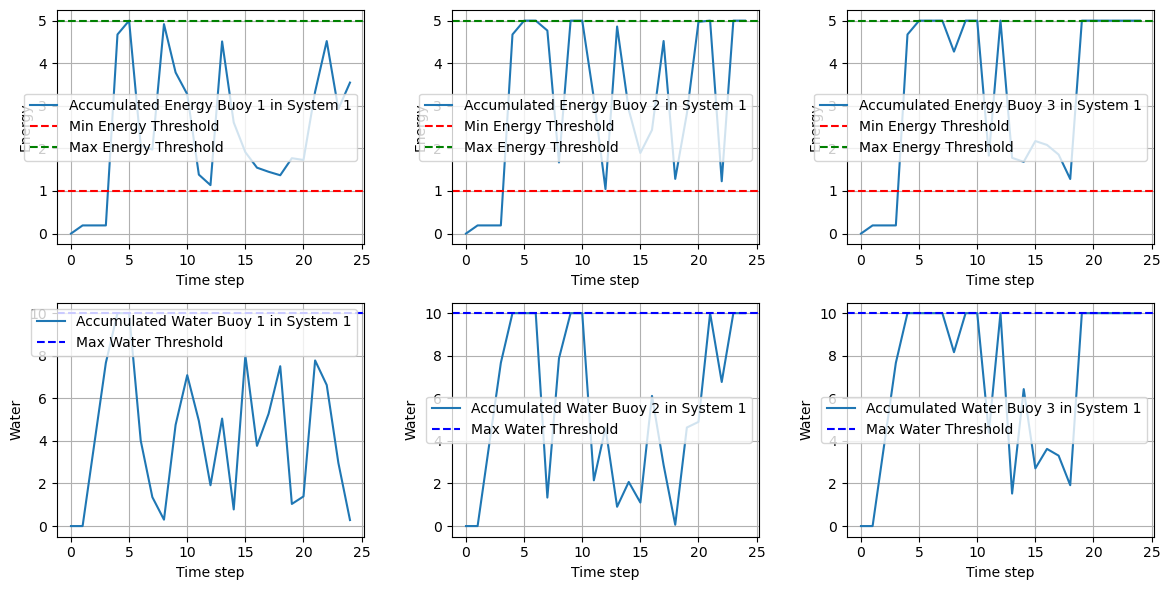

--------------------------------------------------------------------------------------------------------------


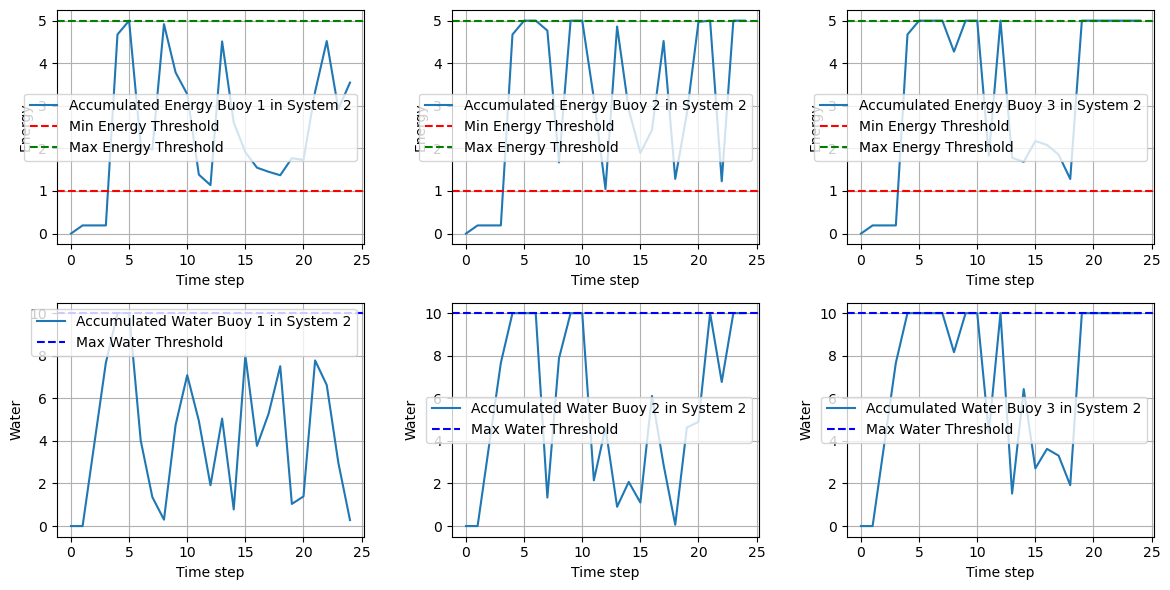

--------------------------------------------------------------------------------------------------------------


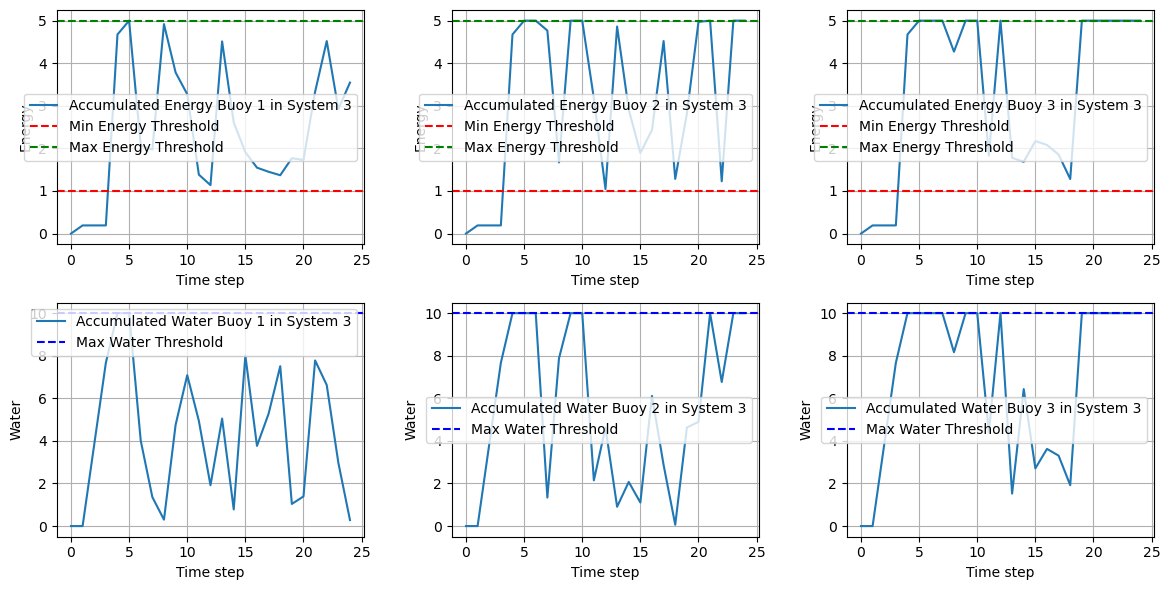

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from collections import Counter

# Parametri globali
num_autonomous_systems = 3  # numero di sistemi di boe autonomi
n = 3  # numero di boe per ciascun sistema
cr = 4.6  # produzione costante di energia rinnovabile per timestep
kc = 0.05  # parametro di conversione energia-acqua
timesteps = 24  # durata della simulazione in ore
initial_energy = 0  # livello iniziale di energia
initial_water = 0  # livello iniziale di acqua
max_energy = 5  # energia massima accumulabile
min_energy = 0.2 * max_energy  # 20% del totale dell'energia accumulabile
max_water = 10  # acqua massima accumulabile
x2_target = 10  # livello target dell'acqua (usato nelle condizioni)
max_vessels = 9  # numero massimo di natanti che possono arrivare in ciascun timestep

# Funzione per inizializzare i vettori di stato
def initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water):
    systems = []
    for _ in range(num_autonomous_systems):
        x1 = np.zeros((n, timesteps + 1))  # energia accumulata per ciascuna boa
        x2 = np.zeros((n, timesteps + 1))  # acqua accumulata per ciascuna boa
        x1[:, 0] = initial_energy
        x2[:, 0] = initial_water
        systems.append((x1, x2))
    return systems

# Funzione per generare il numero di natanti per ciascun timestep
def generate_num_vessels_per_timestep(timesteps, max_vessels):
    num_vessels = np.zeros(timesteps, dtype=int)
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        if 5 <= k < 10:
            num_vessels[k] = np.random.randint(1, max_vessels // 3 + 1)  # Rate basso
        elif 10 <= k < 18:
            num_vessels[k] = np.random.randint(1, max_vessels + 1)  # Rate alto
        elif 18 <= k < 22:
            num_vessels[k] = np.random.randint(1, max_vessels // 2 + 1)  # Rate basso
        elif 2 <= k < 5:
            num_vessels[k] = 0  # Rate nullo
        else:
            num_vessels[k] = np.random.randint(0, 2)  # Rate quasi nullo

    return num_vessels

# Funzione per generare richieste randomiche
def generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels):
    u1 = np.zeros((max_vessels, timesteps + 1))  # energia richiesta da ciascun natante
    u2 = np.zeros((max_vessels, timesteps + 1))  # acqua richiesta da ciascun natante
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        for i in range(num_vessels[k]):
            max_possible_energy_request = max_energy - min_energy
            u1[i, k] = np.random.uniform(0, max_possible_energy_request)
            u2[i, k] = np.random.uniform(0, max_water)
    return u1, u2

# Funzione per aggiornare lo stato delle boe
def update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water):
    for i in range(n):
        if x1[i, k] / kc < (x2_target - x2[i, k]):
            # Caso 1: La batteria non ricarica completamente il serbatoio
            x1[i, k + 1] = cr/24
            x2[i, k + 1] = x2[i, k] + (x1[i, k] / kc)
        else:
            # Caso 2: La batteria ricarica completamente il serbatoio
            x1[i, k + 1] = x1[i, k] + cr - kc * (x2_target - x2[i, k])
            x2[i, k + 1] = x2_target

        # Assicura che l'energia non superi il massimo
        if x1[i, k + 1] > max_energy:
            x1[i, k + 1] = max_energy

        # Assicura che l'acqua non superi il limite massimo
        if x2[i, k + 1] > max_water:
            x2[i, k + 1] = max_water
    return x1, x2

# Funzione per assegnare le richieste dei natanti ai sistemi di boe usando un algoritmo greedy ottimizzato
def assign_requests_optimized(system, system_index, u1, u2, k, num_vessels, min_energy, max_energy, max_water):
    x1, x2 = system
    for i in range(num_vessels):
        best_buoy = None
        min_impact = float('inf')

        for j in range(n):
            if (x1[j, k + 1] - u1[i, k] >= min_energy and x2[j, k + 1] - u2[i, k] >= 0):
                impact = (x1[j, k + 1] - u1[i, k]) + (x2[j, k + 1] - u2[i, k])
                if impact < min_impact:
                    min_impact = impact
                    best_buoy = j

        if best_buoy is not None:
            x1[best_buoy, k + 1] -= u1[i, k]
            x2[best_buoy, k + 1] -= u2[i, k]

            if x1[best_buoy, k + 1] < min_energy:
                x1[best_buoy, k + 1] = min_energy
            if x2[best_buoy, k + 1] < 0:
                x2[best_buoy, k + 1] = 0

            print(f"Vessel {i + 1} assigned to Buoy {best_buoy + 1} in System {system_index + 1}:")
            print(f"  Energy requested: {u1[i, k]}")
            print(f"  Water requested: {u2[i, k]}")
            print(f"  Updated energy for Buoy {best_buoy + 1} in System {system_index + 1}: {x1[best_buoy, k + 1]}")
            print(f"  Updated water for Buoy {best_buoy + 1} in System {system_index + 1}: {x2[best_buoy, k + 1]}")
        else:
            print(f"Vessel {i + 1} could not be assigned at time step {k + 1}")

# Funzione per condividere e verificare i dati tra le boe
def verify_and_consensus(systems, k):
    for system in systems:
        x1, x2 = system

        # Raccolta dei dati
        energy_reports = np.zeros((n, n))
        water_reports = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                energy_reports[i, j] = x1[j, k + 1]
                water_reports[i, j] = x2[j, k + 1]

        # Verifica dei dati
        verified_energy = np.zeros(n)
        verified_water = np.zeros(n)
        for i in range(n):
            energy_counts = Counter(energy_reports[i, :])
            water_counts = Counter(water_reports[i, :])
            verified_energy[i] = energy_counts.most_common(1)[0][0]
            verified_water[i] = water_counts.most_common(1)[0][0]

        # Aggiornamento dei dati verificati
        for i in range(n):
            x1[i, k + 1] = verified_energy[i]
            x2[i, k + 1] = verified_water[i]

# Funzione per eseguire la simulazione
def run_simulation_optimized(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels):
    systems = initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water)
    num_vessels = generate_num_vessels_per_timestep(timesteps, max_vessels)
    u1, u2 = generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels)

    for k in range(timesteps):
        print(f"Time step {k + 1}")

        for system_index, (x1, x2) in enumerate(systems):
            systems[system_index] = update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water)
        verify_and_consensus(systems, k)
        for system_index, system in enumerate(systems):
            if num_vessels[k] > 0:
                print(f"Assigning requests for system {system_index + 1}")
                assign_requests_optimized(system, system_index, u1, u2, k, num_vessels[k], min_energy, max_energy, max_water)
        print("\n")

    return systems

# Funzione per visualizzare i risultati
def plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water):
    for system_index, (x1, x2) in enumerate(systems):
        print("--------------------------------------------------------------------------------------------------------------")
        plt.figure(figsize=(12, 6))
        
        for i in range(n):
            plt.subplot(2, n, i + 1)
            plt.plot(x1[i], label=f'Accumulated Energy Buoy {i+1} in System {system_index + 1}')
            plt.axhline(min_energy, color='r', linestyle='--', label='Min Energy Threshold')
            plt.axhline(max_energy, color='g', linestyle='--', label='Max Energy Threshold')
            plt.xlabel('Time step')
            plt.ylabel('Energy')
            plt.legend()
            plt.grid(True)

            plt.subplot(2, n, i + 1 + n)
            plt.plot(x2[i], label=f'Accumulated Water Buoy {i+1} in System {system_index + 1}')
            plt.axhline(max_water, color='b', linestyle='--', label='Max Water Threshold')
            plt.xlabel('Time step')
            plt.ylabel('Water')
            plt.legend()
            plt.grid(True)

        plt.tight_layout()
        plt.show()

# Esegui la simulazione con più sistemi di boe
systems = run_simulation_optimized(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels)

# Visualizza i risultati
plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water)


## Assignment of time axes in time slots

Time step 1


Time step 2
Assigning requests for system 1
Vessel 1 could not be assigned at time step 2
Assigning requests for system 2
Vessel 1 could not be assigned at time step 2
Assigning requests for system 3
Vessel 1 could not be assigned at time step 2


Time step 3


Time step 4


Time step 5


Time step 6
Assigning requests for system 1
Vessel 1 assigned to Buoy 1 in System 1:
  Energy requested: 2.9279757672456204
  Water requested: 5.986584841970366
  Updated energy for Buoy 1 in System 1: 2.0720242327543796
  Updated water for Buoy 1 in System 1: 4.013415158029634
Assigning requests for system 2
Vessel 1 assigned to Buoy 1 in System 2:
  Energy requested: 2.9279757672456204
  Water requested: 5.986584841970366
  Updated energy for Buoy 1 in System 2: 2.0720242327543796
  Updated water for Buoy 1 in System 2: 4.013415158029634
Assigning requests for system 3
Vessel 1 assigned to Buoy 1 in System 3:
  Energy requested: 2.9279757672456204
  Water requested: 5.986584841970366
 

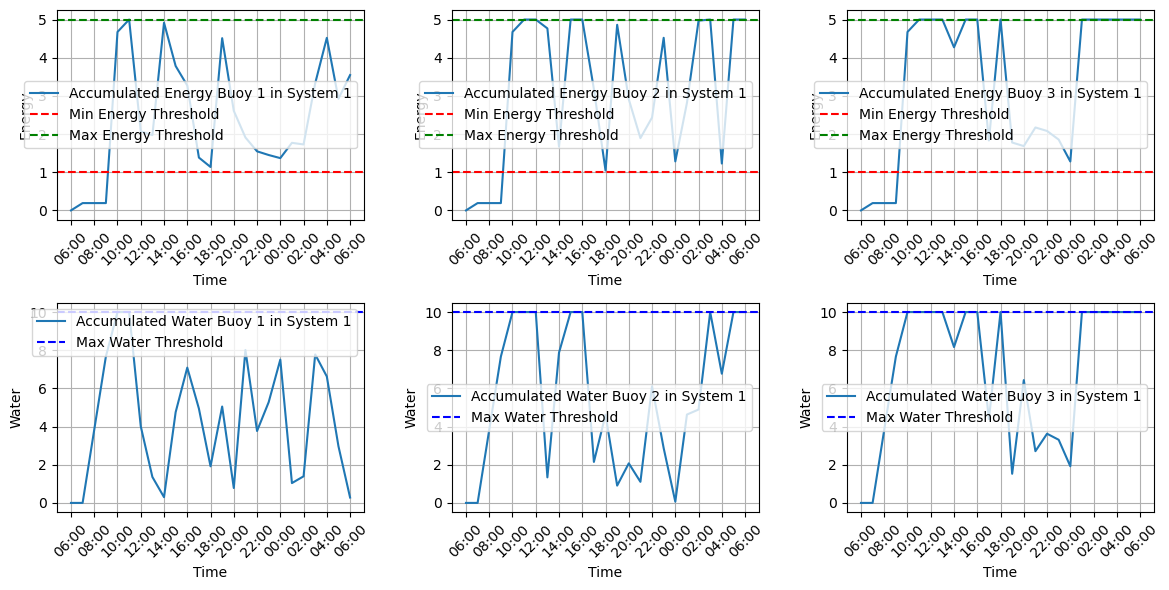

Plot saved as system_1_results.png
--------------------------------------------------------------------------------------------------------------


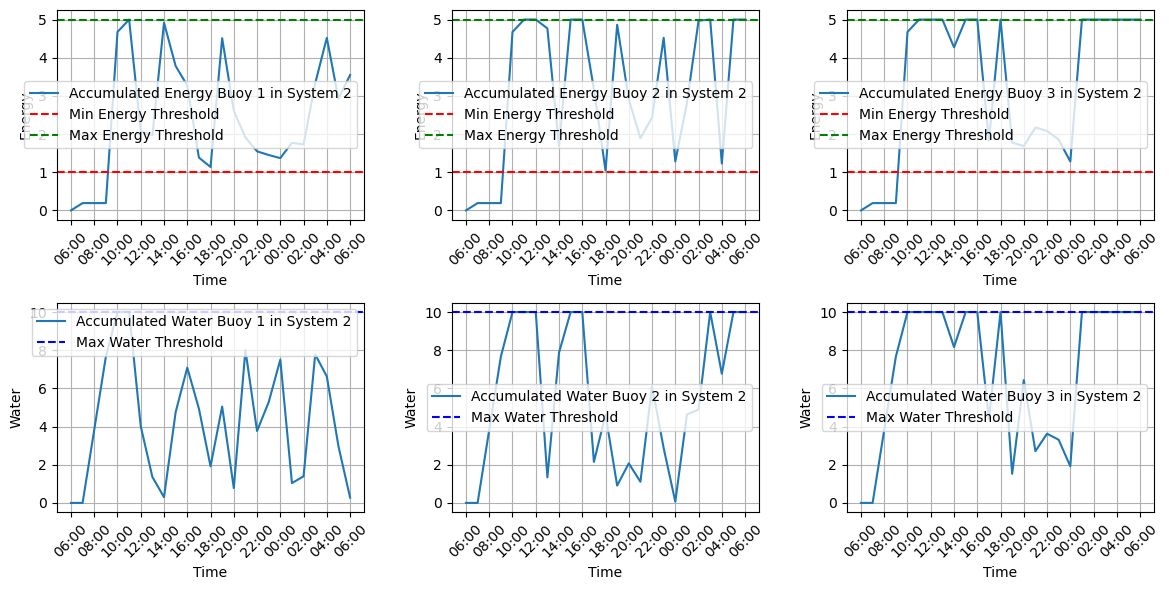

Plot saved as system_2_results.png
--------------------------------------------------------------------------------------------------------------


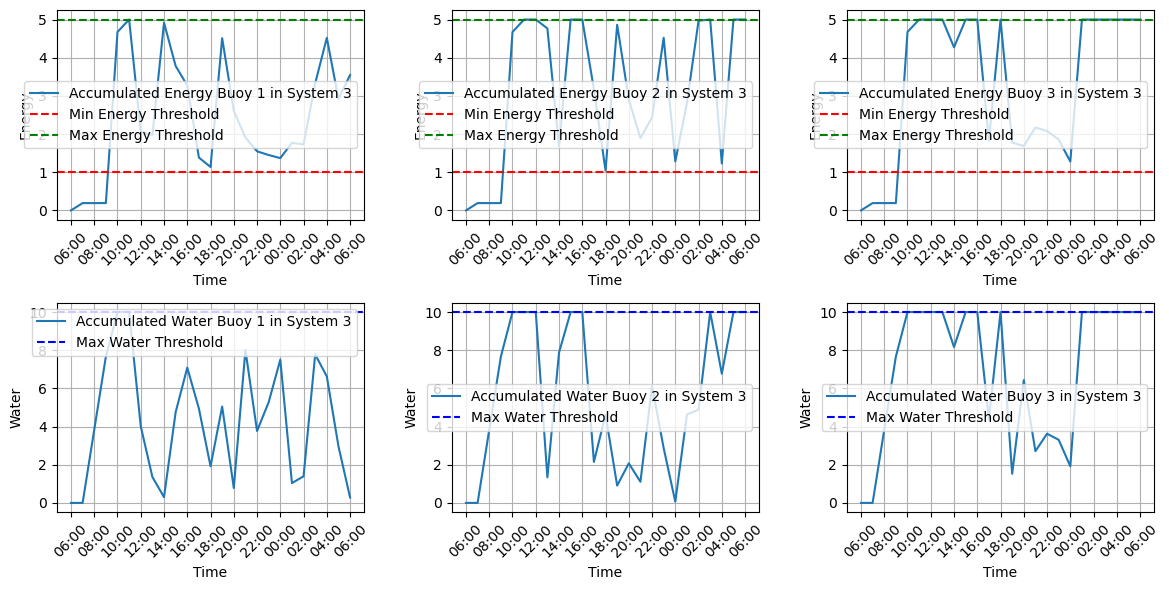

Plot saved as system_3_results.png


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from collections import Counter

# Parametri globali
num_autonomous_systems = 3  # numero di sistemi di boe autonomi
n = 3  # numero di boe per ciascun sistema
cr = 4.6  # produzione costante di energia rinnovabile per timestep
kc = 0.05  # parametro di conversione energia-acqua
timesteps = 24  # durata della simulazione in ore
initial_energy = 0  # livello iniziale di energia
initial_water = 0  # livello iniziale di acqua
max_energy = 5  # energia massima accumulabile
min_energy = 0.2 * max_energy  # 20% del totale dell'energia accumulabile
max_water = 10  # acqua massima accumulabile
x2_target = 10  # livello target dell'acqua (usato nelle condizioni)
max_vessels = 9  # numero massimo di natanti che possono arrivare in ciascun timestep

# Funzione per inizializzare i vettori di stato
def initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water):
    systems = []
    for _ in range(num_autonomous_systems):
        x1 = np.zeros((n, timesteps + 1))  # energia accumulata per ciascuna boa
        x2 = np.zeros((n, timesteps + 1))  # acqua accumulata per ciascuna boa
        x1[:, 0] = initial_energy
        x2[:, 0] = initial_water
        systems.append((x1, x2))
    return systems

# Funzione per generare il numero di natanti per ciascun timestep
def generate_num_vessels_per_timestep(timesteps, max_vessels):
    num_vessels = np.zeros(timesteps, dtype=int)
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        if 5 <= k < 10:
            num_vessels[k] = np.random.randint(1, max_vessels // 3 + 1)  # Rate basso
        elif 10 <= k < 18:
            num_vessels[k] = np.random.randint(1, max_vessels + 1)  # Rate alto
        elif 18 <= k < 22:
            num_vessels[k] = np.random.randint(1, max_vessels // 2 + 1)  # Rate basso
        elif 2 <= k < 5:
            num_vessels[k] = 0  # Rate nullo
        else:
            num_vessels[k] = np.random.randint(0, 2)  # Rate quasi nullo

    return num_vessels

# Funzione per generare richieste randomiche
def generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels):
    u1 = np.zeros((max_vessels, timesteps + 1))  # energia richiesta da ciascun natante
    u2 = np.zeros((max_vessels, timesteps + 1))  # acqua richiesta da ciascun natante
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        for i in range(num_vessels[k]):
            max_possible_energy_request = max_energy - min_energy
            u1[i, k] = np.random.uniform(0, max_possible_energy_request)
            u2[i, k] = np.random.uniform(0, max_water)
    return u1, u2

# Funzione per aggiornare lo stato delle boe
def update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water):
    for i in range(n):
        if x1[i, k] / kc < (x2_target - x2[i, k]):
            # Caso 1: La batteria non ricarica completamente il serbatoio
            x1[i, k + 1] = cr/24
            x2[i, k + 1] = x2[i, k] + (x1[i, k] / kc)
        else:
            # Caso 2: La batteria ricarica completamente il serbatoio
            x1[i, k + 1] = x1[i, k] + cr - kc * (x2_target - x2[i, k])
            x2[i, k + 1] = x2_target

        # Assicura che l'energia non superi il massimo
        if x1[i, k + 1] > max_energy:
            x1[i, k + 1] = max_energy

        # Assicura che l'acqua non superi il limite massimo
        if x2[i, k + 1] > max_water:
            x2[i, k + 1] = max_water
    return x1, x2

# Funzione per assegnare le richieste dei natanti ai sistemi di boe usando un algoritmo greedy ottimizzato
def assign_requests_optimized(system, system_index, u1, u2, k, num_vessels, min_energy, max_energy, max_water):
    x1, x2 = system
    for i in range(num_vessels):
        best_buoy = None
        min_impact = float('inf')

        for j in range(n):
            if (x1[j, k + 1] - u1[i, k] >= min_energy and x2[j, k + 1] - u2[i, k] >= 0):
                impact = (x1[j, k + 1] - u1[i, k]) + (x2[j, k + 1] - u2[i, k])
                if impact < min_impact:
                    min_impact = impact
                    best_buoy = j

        if best_buoy is not None:
            x1[best_buoy, k + 1] -= u1[i, k]
            x2[best_buoy, k + 1] -= u2[i, k]

            if x1[best_buoy, k + 1] < min_energy:
                x1[best_buoy, k + 1] = min_energy
            if x2[best_buoy, k + 1] < 0:
                x2[best_buoy, k + 1] = 0

            print(f"Vessel {i + 1} assigned to Buoy {best_buoy + 1} in System {system_index + 1}:")
            print(f"  Energy requested: {u1[i, k]}")
            print(f"  Water requested: {u2[i, k]}")
            print(f"  Updated energy for Buoy {best_buoy + 1} in System {system_index + 1}: {x1[best_buoy, k + 1]}")
            print(f"  Updated water for Buoy {best_buoy + 1} in System {system_index + 1}: {x2[best_buoy, k + 1]}")
        else:
            print(f"Vessel {i + 1} could not be assigned at time step {k + 1}")

# Funzione per condividere e verificare i dati tra le boe
def verify_and_consensus(systems, k):
    for system in systems:
        x1, x2 = system

        # Raccolta dei dati
        energy_reports = np.zeros((n, n))
        water_reports = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                energy_reports[i, j] = x1[j, k + 1]
                water_reports[i, j] = x2[j, k + 1]

        # Verifica dei dati
        verified_energy = np.zeros(n)
        verified_water = np.zeros(n)
        for i in range(n):
            energy_counts = Counter(energy_reports[i, :])
            water_counts = Counter(water_reports[i, :])
            verified_energy[i] = energy_counts.most_common(1)[0][0]
            verified_water[i] = water_counts.most_common(1)[0][0]

        # Aggiornamento dei dati verificati
        for i in range(n):
            x1[i, k + 1] = verified_energy[i]
            x2[i, k + 1] = verified_water[i]

# Funzione per eseguire la simulazione
def run_simulation_optimized(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels):
    systems = initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water)
    num_vessels = generate_num_vessels_per_timestep(timesteps, max_vessels)
    u1, u2 = generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels)

    for k in range(timesteps):
        print(f"Time step {k + 1}")

        for system_index, (x1, x2) in enumerate(systems):
            systems[system_index] = update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water)
        verify_and_consensus(systems, k)
        for system_index, system in enumerate(systems):
            if num_vessels[k] > 0:
                print(f"Assigning requests for system {system_index + 1}")
                assign_requests_optimized(system, system_index, u1, u2, k, num_vessels[k], min_energy, max_energy, max_water)
        print("\n")

    return systems

# Funzione per visualizzare e salvare i risultati
def plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water):
    time_labels = [f"{(6 + i) % 24:02d}:00" for i in range(timesteps + 1)]
    for system_index, (x1, x2) in enumerate(systems):
        print("--------------------------------------------------------------------------------------------------------------")
        plt.figure(figsize=(12, 6))
        
        for i in range(n):
            plt.subplot(2, n, i + 1)
            plt.plot(x1[i], label=f'Accumulated Energy Buoy {i+1} in System {system_index + 1}')
            plt.axhline(min_energy, color='r', linestyle='--', label='Min Energy Threshold')
            plt.axhline(max_energy, color='g', linestyle='--', label='Max Energy Threshold')
            plt.xlabel('Time')
            plt.ylabel('Energy')
            plt.xticks(ticks=range(0, timesteps + 1, 2), labels=time_labels[::2], rotation=45)
            plt.legend()
            plt.grid(True)

            plt.subplot(2, n, i + 1 + n)
            plt.plot(x2[i], label=f'Accumulated Water Buoy {i+1} in System {system_index + 1}')
            plt.axhline(max_water, color='b', linestyle='--', label='Max Water Threshold')
            plt.xlabel('Time')
            plt.ylabel('Water')
            plt.xticks(ticks=range(0, timesteps + 1, 2), labels=time_labels[::2], rotation=45)
            plt.legend()
            plt.grid(True)

        plt.tight_layout()
        output_path = f"system_{system_index + 1}_results.png"
        plt.savefig(output_path)  # Salva il plot come file PNG
        plt.show()
        print(f"Plot saved as {output_path}")

# Esegui la simulazione con più sistemi di boe
systems = run_simulation_optimized(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels)

# Visualizza e salva i risultati
plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water)


## Assignment thanks to the use of buoy commanders - one per AS

Time step 1
Consensus process at time step 1
System 1 updating verified data for Buoy 1:
  Verified energy: 0.19166666666666665
  Verified water: 0.0
System 1 updating verified data for Buoy 2:
  Verified energy: 0.19166666666666665
  Verified water: 0.0
System 1 updating verified data for Buoy 3:
  Verified energy: 0.19166666666666665
  Verified water: 0.0
System 2 updating verified data for Buoy 1:
  Verified energy: 0.19166666666666665
  Verified water: 0.0
System 2 updating verified data for Buoy 2:
  Verified energy: 0.19166666666666665
  Verified water: 0.0
System 2 updating verified data for Buoy 3:
  Verified energy: 0.19166666666666665
  Verified water: 0.0
System 3 updating verified data for Buoy 1:
  Verified energy: 0.19166666666666665
  Verified water: 0.0
System 3 updating verified data for Buoy 2:
  Verified energy: 0.19166666666666665
  Verified water: 0.0
System 3 updating verified data for Buoy 3:
  Verified energy: 0.19166666666666665
  Verified water: 0.0


Time ste

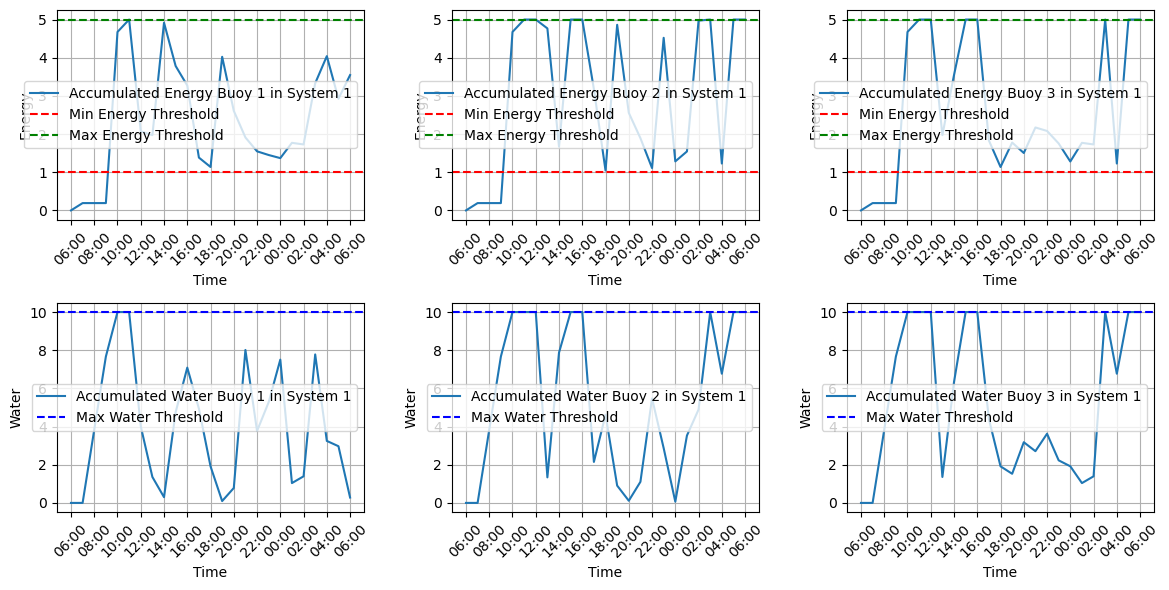

Plot saved as system_1_results.png
--------------------------------------------------------------------------------------------------------------


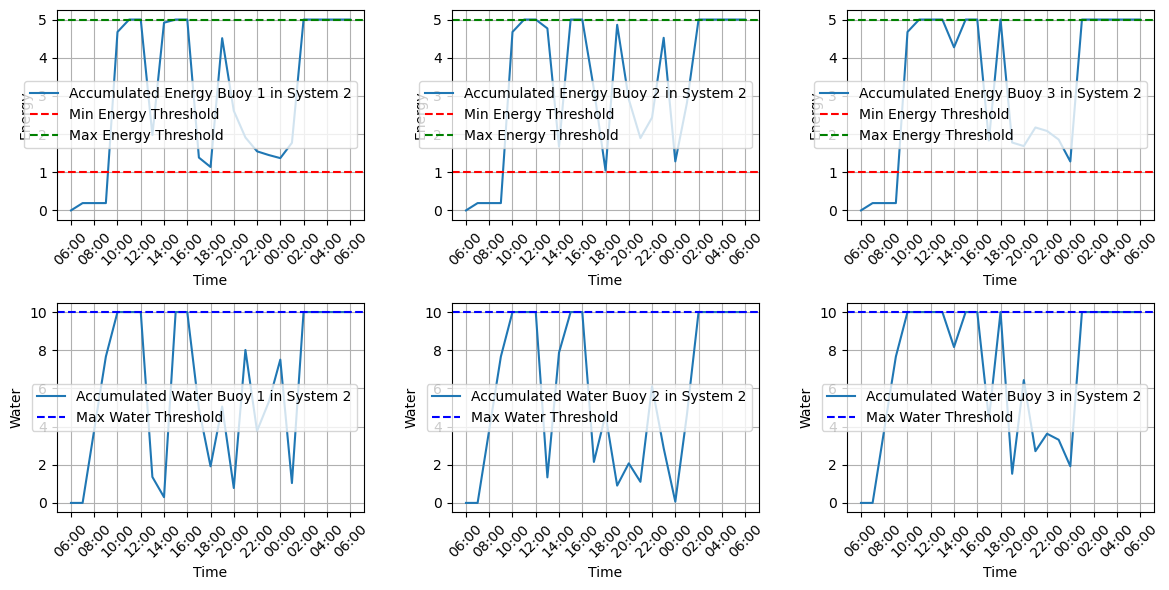

Plot saved as system_2_results.png
--------------------------------------------------------------------------------------------------------------


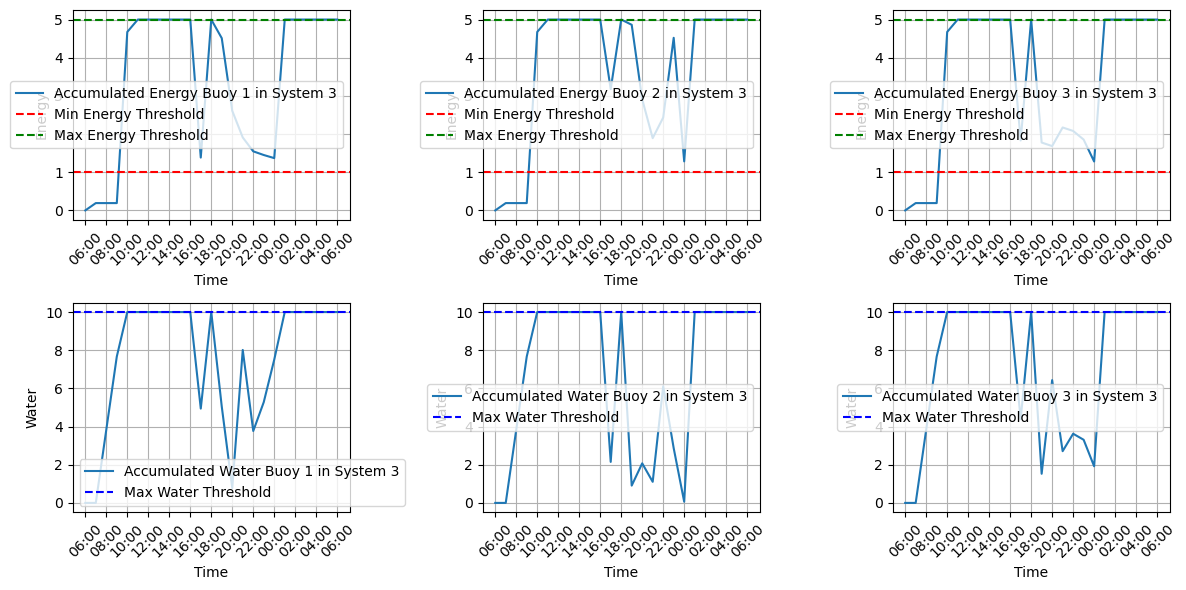

Plot saved as system_3_results.png


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Parametri globali
num_autonomous_systems = 3  # numero di sistemi di boe autonomi
n = 3  # numero di boe per ciascun sistema
cr = 4.6  # produzione costante di energia rinnovabile per timestep
kc = 0.05  # parametro di conversione energia-acqua
timesteps = 24  # durata della simulazione in ore
initial_energy = 0  # livello iniziale di energia
initial_water = 0  # livello iniziale di acqua
max_energy = 5  # energia massima accumulabile
min_energy = 0.2 * max_energy  # 20% del totale dell'energia accumulabile
max_water = 10  # acqua massima accumulabile
x2_target = 10  # livello target dell'acqua (usato nelle condizioni)
max_vessels = 9  # numero massimo di natanti che possono arrivare in ciascun timestep

# Funzione per inizializzare i vettori di stato
def initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water):
    systems = []
    for _ in range(num_autonomous_systems):
        x1 = np.zeros((n, timesteps + 1))  # energia accumulata per ciascuna boa
        x2 = np.zeros((n, timesteps + 1))  # acqua accumulata per ciascuna boa
        x1[:, 0] = initial_energy
        x2[:, 0] = initial_water
        systems.append((x1, x2))
    return systems

# Funzione per generare il numero di natanti per ciascun timestep
def generate_num_vessels_per_timestep(timesteps, max_vessels):
    num_vessels = np.zeros(timesteps, dtype=int)
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        if 5 <= k < 10:
            num_vessels[k] = np.random.randint(1, max_vessels // 3 + 1)  # Rate basso
        elif 10 <= k < 18:
            num_vessels[k] = np.random.randint(1, max_vessels + 1)  # Rate alto
        elif 18 <= k < 22:
            num_vessels[k] = np.random.randint(1, max_vessels // 2 + 1)  # Rate basso
        elif 2 <= k < 5:
            num_vessels[k] = 0  # Rate nullo
        else:
            num_vessels[k] = np.random.randint(0, 2)  # Rate quasi nullo

    return num_vessels

# Funzione per generare richieste randomiche
def generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels):
    u1 = np.zeros((max_vessels, timesteps + 1))  # energia richiesta da ciascun natante
    u2 = np.zeros((max_vessels, timesteps + 1))  # acqua richiesta da ciascun natante
    np.random.seed(42)  # per riproducibilità

    for k in range(timesteps):
        for i in range(num_vessels[k]):
            max_possible_energy_request = max_energy - min_energy
            u1[i, k] = np.random.uniform(0, max_possible_energy_request)
            u2[i, k] = np.random.uniform(0, max_water)
    return u1, u2

# Funzione per aggiornare lo stato delle boe
def update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water):
    for i in range(n):
        if x1[i, k] / kc < (x2_target - x2[i, k]):
            # Caso 1: La batteria non ricarica completamente il serbatoio
            x1[i, k + 1] = cr/24
            x2[i, k + 1] = x2[i, k] + (x1[i, k] / kc)
        else:
            # Caso 2: La batteria ricarica completamente il serbatoio
            x1[i, k + 1] = x1[i, k] + cr - kc * (x2_target - x2[i, k])
            x2[i, k + 1] = x2_target

        # Assicura che l'energia non superi il massimo
        if x1[i, k + 1] > max_energy:
            x1[i, k + 1] = max_energy

        # Assicura che l'acqua non superi il limite massimo
        if x2[i, k + 1] > max_water:
            x2[i, k + 1] = max_water
    return x1, x2

# Funzione per assegnare le richieste dei natanti a una boa all'interno di un sistema
def assign_requests_to_buoys(system, u1, u2, k, num_vessels, min_energy, max_energy, max_water, system_index):
    x1, x2 = system
    for i in range(num_vessels):
        best_buoy = None
        min_impact = float('inf')

        for j in range(n):
            if (x1[j, k + 1] - u1[i, k] >= min_energy and x2[j, k + 1] - u2[i, k] >= 0):
                impact = (x1[j, k + 1] - u1[i, k]) + (x2[j, k + 1] - u2[i, k])
                if impact < min_impact:
                    min_impact = impact
                    best_buoy = j

        if best_buoy is not None:
            x1[best_buoy, k + 1] -= u1[i, k]
            x2[best_buoy, k + 1] -= u2[i, k]
            if x1[best_buoy, k + 1] < min_energy:
                x1[best_buoy, k + 1] = min_energy
            if x2[best_buoy, k + 1] < 0:
                x2[best_buoy, k + 1] = 0
            print(f"Vessel {i + 1} assigned to Buoy {best_buoy + 1} in System {system_index + 1}:")
            print(f"  Energy requested: {u1[i, k]}")
            print(f"  Water requested: {u2[i, k]}")
            print(f"  Updated energy for Buoy {best_buoy + 1} in System {system_index + 1}: {x1[best_buoy, k + 1]}")
            print(f"  Updated water for Buoy {best_buoy + 1} in System {system_index + 1}: {x2[best_buoy, k + 1]}")
        else:
            print(f"Vessel {i + 1} could not be assigned to any Buoy in System {system_index + 1}")

# Funzione per assegnare le richieste dei natanti ai sistemi di boe
def assign_requests_to_systems(systems, u1, u2, k, num_vessels, min_energy, max_energy, max_water):
    for i in range(num_vessels[k]):
        assigned = False
        for system_index, system in enumerate(systems):
            x1, x2 = system
            for j in range(n):
                if (x1[j, k + 1] - u1[i, k] >= min_energy and x2[j, k + 1] - u2[i, k] >= 0):
                    print(f"Commander of System {system_index + 1} is considering assignment of Vessel {i + 1} to Buoy {j + 1}")
                    assign_requests_to_buoys(system, u1, u2, k, num_vessels[k], min_energy, max_energy, max_water, system_index)
                    assigned = True
                    break
            if assigned:
                break
        if not assigned:
            print(f"Vessel {i + 1} could not be assigned to any System at time step {k + 1}")

# Funzione per condividere e verificare i dati tra i sistemi
def verify_and_consensus(systems, k):
    print(f"Consensus process at time step {k + 1}")
    for system_index, system in enumerate(systems):
        x1, x2 = system

        # Raccolta dei dati
        energy_reports = np.zeros((num_autonomous_systems, n))
        water_reports = np.zeros((num_autonomous_systems, n))
        for other_system_index, other_system in enumerate(systems):
            if other_system_index != system_index:
                other_x1, other_x2 = other_system
                for i in range(n):
                    energy_reports[other_system_index, i] = other_x1[i, k + 1]
                    water_reports[other_system_index, i] = other_x2[i, k + 1]

        # Verifica dei dati
        verified_energy = np.zeros(n)
        verified_water = np.zeros(n)
        for i in range(n):
            energy_counts = Counter(energy_reports[:, i])
            water_counts = Counter(water_reports[:, i])
            verified_energy[i] = energy_counts.most_common(1)[0][0]
            verified_water[i] = water_counts.most_common(1)[0][0]

        # Aggiornamento dei dati verificati
        for i in range(n):
            print(f"System {system_index + 1} updating verified data for Buoy {i + 1}:")
            print(f"  Verified energy: {verified_energy[i]}")
            print(f"  Verified water: {verified_water[i]}")
            x1[i, k + 1] = verified_energy[i]
            x2[i, k + 1] = verified_water[i]

# Funzione per eseguire la simulazione
def run_simulation_optimized(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels):
    systems = initialize_state_vectors(num_autonomous_systems, n, timesteps, initial_energy, initial_water)
    num_vessels = generate_num_vessels_per_timestep(timesteps, max_vessels)
    u1, u2 = generate_random_requests(timesteps, max_vessels, max_energy, min_energy, max_water, num_vessels)

    for k in range(timesteps):
        print(f"Time step {k + 1}")

        for system_index, (x1, x2) in enumerate(systems):
            systems[system_index] = update_buoys(x1, x2, k, cr, kc, x2_target, max_energy, max_water)
        verify_and_consensus(systems, k)
        if num_vessels[k] > 0:
            print(f"Assigning requests for time step {k + 1}")
            assign_requests_to_systems(systems, u1, u2, k, num_vessels, min_energy, max_energy, max_water)
        print("\n")

    return systems

# Funzione per visualizzare e salvare i risultati
def plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water):
    time_labels = [f"{(6 + i) % 24:02d}:00" for i in range(timesteps + 1)]
    for system_index, (x1, x2) in enumerate(systems):
        print("--------------------------------------------------------------------------------------------------------------")
        plt.figure(figsize=(12, 6))
        
        for i in range(n):
            plt.subplot(2, n, i + 1)
            plt.plot(x1[i], label=f'Accumulated Energy Buoy {i+1} in System {system_index + 1}')
            plt.axhline(min_energy, color='r', linestyle='--', label='Min Energy Threshold')
            plt.axhline(max_energy, color='g', linestyle='--', label='Max Energy Threshold')
            plt.xlabel('Time')
            plt.ylabel('Energy')
            plt.xticks(ticks=range(0, timesteps + 1, 2), labels=time_labels[::2], rotation=45)
            plt.legend()
            plt.grid(True)

            plt.subplot(2, n, i + 1 + n)
            plt.plot(x2[i], label=f'Accumulated Water Buoy {i+1} in System {system_index + 1}')
            plt.axhline(max_water, color='b', linestyle='--', label='Max Water Threshold')
            plt.xlabel('Time')
            plt.ylabel('Water')
            plt.xticks(ticks=range(0, timesteps + 1, 2), labels=time_labels[::2], rotation=45)
            plt.legend()
            plt.grid(True)

        plt.tight_layout()
        output_path = f"system_{system_index + 1}_results.png"
        plt.savefig(output_path)  # Salva il plot come file PNG
        plt.show()
        print(f"Plot saved as {output_path}")

# Esegui la simulazione con più sistemi di boe
systems = run_simulation_optimized(num_autonomous_systems, n, timesteps, cr, kc, x2_target, max_energy, min_energy, max_water, max_vessels)

# Visualizza e salva i risultati
plot_results_multiple_systems(systems, n, timesteps, min_energy, max_energy, max_water)
